## NETFLIX Clustering Analysis

### Name: Rishik Suddapalli

# **Problem Statement**
## Perform EDA and perform Clustring algo on Netflix dataset

## ***1. Know Your Data***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (7787, 12)


In [3]:
# Dataset First Look
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Dataset Rows & Columns count
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

Dataset contains 7787 rows and 12 columns


In [5]:
# Dataset Info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Dataset Duplicate Value Count
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print("\nUnique values count for each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Number of duplicate rows: 0

Unique values count for each column:
show_id: 7787 unique values
type: 2 unique values
title: 7787 unique values
director: 4049 unique values
cast: 6831 unique values
country: 681 unique values
date_added: 1565 unique values
release_year: 73 unique values
rating: 14 unique values
duration: 216 unique values
listed_in: 492 unique values
description: 7769 unique values


In [7]:
# Missing Values/Null Values Count
print("Missing Values Count:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Missing Values Count:
director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64


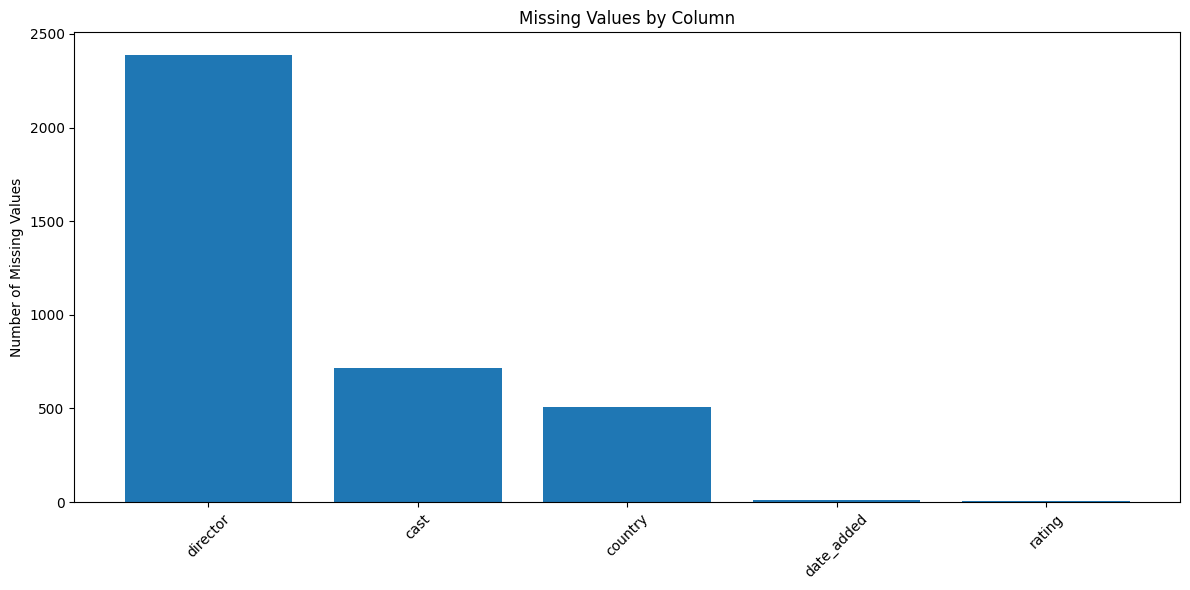

In [8]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
plt.bar(missing_data.index, missing_data.values)
plt.title('Missing Values by Column')
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.tight_layout()
plt.show()

## Dataset Summary
### *Dataset Name: NETFLIX MOVIES AND TV SHOWS CLUSTERING*
### *Records: 7,787 TV shows and movies*
### *Time Period: Content available on Netflix as of 2019*
### *Source: Collected from Flixable (third-party Netflix search engine)*
### *Key Business Context: TV shows have nearly tripled since 2010, while movies decreased by 2,000+ titles*

## Missing Value Distribution:
### Director: 2,389 missing (30.7%) - Significant gap
### Cast: 718 missing (9.2%) - Moderate concern
### Country: 507 missing (6.5%) - Manageable
### Date Added: 10 missing (0.1%) - Minimal impact
### Rating: 7 missing (0.09%) - Negligible

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print("Column Data Types and Sample Values:")
for col in df.columns:
    print(f"\n{col}:")
    print(f"  Data Type: {df[col].dtype}")
    print(f"  Sample Values: {df[col].head(3).tolist()}")

Column Data Types and Sample Values:

show_id:
  Data Type: object
  Sample Values: ['s1', 's2', 's3']

type:
  Data Type: object
  Sample Values: ['TV Show', 'Movie', 'Movie']

title:
  Data Type: object
  Sample Values: ['3%', '7:19', '23:59']

director:
  Data Type: object
  Sample Values: [nan, 'Jorge Michel Grau', 'Gilbert Chan']

cast:
  Data Type: object
  Sample Values: ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi', 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato', 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim']

country:
  Data Type: object
  Sample Values: ['Brazil', 'Mexico', 'Singapore']

date_added:
  Data Type: object
  Sample Values: ['August 14, 2020', 'December 23, 2016', 'December 20, 2018']

release_year:
  Data Type: int64
  Sample Valu

In [10]:
# Dataset Describe
print("Statistical Summary:")
df.describe(include='all')

Statistical Summary:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN



## Detailed Variables Description
### 1. *Identifier Variables*
### show_id

### Type: Categorical (Nominal)
### Description: Unique identifier for each content item
### Characteristics:
#### All values are unique (7,787 distinct IDs)
#### Format: alphanumeric (e.g., "s1", "s2")
### Usage: Primary key for data management

### title

### Type: Categorical (Nominal)
### Description: Name of the TV show or movie
### Characteristics:
#### All values are unique
#### Contains international titles
### Usage: Content identification and text analysis

## 2. Content Classification Variables
### type

### Type: Categorical (Binary)
### Description: Content format classification
### Categories:
#### "Movie"
#### "TV Show"
### Business Significance: Critical for analyzing Netflix's strategic shift from movies to TV shows

### listed_in

### Type: Categorical (Multi-label)
### Description: Genre/category classification
### Characteristics:
#### 492 unique genre combinations
#### Multiple genres per title (comma-separated)
#### Examples: "International TV Shows, TV Dramas, TV Sci-Fi & Fantasy"
### Usage: Content categorization and clustering

### rating

### Type: Categorical (Ordinal)
### Description: Content maturity rating
### Categories: 14 unique ratings including:
#### TV-MA, TV-14, TV-PG (TV ratings)
#### R, PG-13, PG (Movie ratings)
#### NR, UR (Not Rated/Unrated)
### Missing Values: 7 records

## 3. *Temporal Variables*
### release_year

### Type: Numerical (Discrete)
### Description: Original release year of content
### Range: 73 unique years (spanning several decades)
### Usage: Trend analysis and content aging

### date_added

### Type: Date (String format)
### Description: When content was added to Netflix platform
### Format: "Month Day, Year" (e.g., "August 14, 2020")
### Missing Values: 10 records
### Usage: Platform growth analysis and content acquisition trends

## 4.*Production & Geographical Variables*
### director

### Type: Categorical (Nominal)
### Description: Content director(s)
### Characteristics:
#### 4,049 unique directors
#### High missing values (2,389 records, ~30.7%)
#### Multiple directors possible (comma-separated)
### Usage: Creator-based analysis and clustering

### cast

### Type: Categorical (Multi-label)
### Description: Main cast members
### Characteristics:
#### 6,831 unique cast combinations
#### 718 missing values (~9.2%)
#### Contains extensive comma-separated lists
### Usage: Star power analysis and actor-based clustering

### country

### Type: Categorical (Multi-label)
### Description: Production country/countries
### Characteristics:
#### 681 unique country combinations
#### 507 missing values (~6.5%)
#### Multiple countries possible for co-productions
### Usage: Geographical content analysis and regional strategy

## 5. *Content Description Variables*   
### duration

### Type: Mixed (Numerical + Categorical)
### Description: Runtime or season count
### Format:
#### Movies: "X min" (e.g., "93 min")
#### TV Shows: "X Seasons" (e.g., "4 Seasons")
### Unique Values: 216 combinations
### Usage: Content length analysis and user engagement patterns

### description

### Type: Text (String)
### Description: Plot summary/synopsis
### Characteristics:
#### 7,769 unique descriptions (18 duplicates)
#### Rich textual data for NLP analysis
### Usage: Content similarity analysis and text-based clustering

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
print("Unique Values for each variable:")
for column in df.columns:
    unique_vals = df[column].nunique()
    print(f"{column}: {unique_vals} unique values")
    if unique_vals <= 10:
        print(f"  Values: {df[column].unique()}")

Unique Values for each variable:
show_id: 7787 unique values
type: 2 unique values
  Values: ['TV Show' 'Movie']
title: 7787 unique values
director: 4049 unique values
cast: 6831 unique values
country: 681 unique values
date_added: 1565 unique values
release_year: 73 unique values
rating: 14 unique values
duration: 216 unique values
listed_in: 492 unique values
description: 7769 unique values


## 3. ***Data Wrangling***

In [12]:
# Data Cleaning and Feature Engineering
# Create a copy for cleaning
df_clean = df.copy()

# Handle missing values
print("Missing values before cleaning:")
print(df_clean.isnull().sum())

# Fill missing values appropriately
df_clean['director'].fillna('Unknown', inplace=True)
df_clean['cast'].fillna('Unknown', inplace=True)
df_clean['country'].fillna('Unknown', inplace=True)
df_clean['rating'].fillna('Unknown', inplace=True)

# --- FIXED DATE CONVERSION AND CLEANING ---
# Convert date_added to datetime
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], format='%B %d, %Y', errors='coerce')

# Fill remaining NaT values with the mode (most common date)
if df_clean['date_added'].isna().sum() > 0:
    most_common_date = df_clean['date_added'].mode()[0]
    df_clean['date_added'].fillna(most_common_date, inplace=True)

# Extract features from date_added
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month
df_clean['day_added'] = df_clean['date_added'].dt.day

# --- DURATION CLEANING ---
def extract_duration(duration):
    if pd.isna(duration):
        return np.nan
    if 'Season' in duration:
        return int(duration.split()[0])
    elif 'min' in duration:
        return int(duration.split()[0])
    else:
        return np.nan

df_clean['duration_numeric'] = df_clean['duration'].apply(extract_duration)
df_clean['duration_type'] = df_clean['duration'].apply(
    lambda x: 'Seasons' if 'Season' in x else 'Minutes' if 'min' in x else 'Unknown'
)

# --- GENRE PROCESSING ---
df_clean['genres'] = df_clean['listed_in'].str.split(', ')
df_clean['genre_count'] = df_clean['genres'].apply(len)

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())


Missing values before cleaning:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Missing values after cleaning:
show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
year_added          0
month_added         0
day_added           0
duration_numeric    0
duration_type       0
genres              0
genre_count         0
dtype: int64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_12780\2716177414.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['director'].fillna('Unknown', inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_12780\2716177414.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

### Exploratory Data Analysis with Visualizations
#### 1. Content Type Distribution

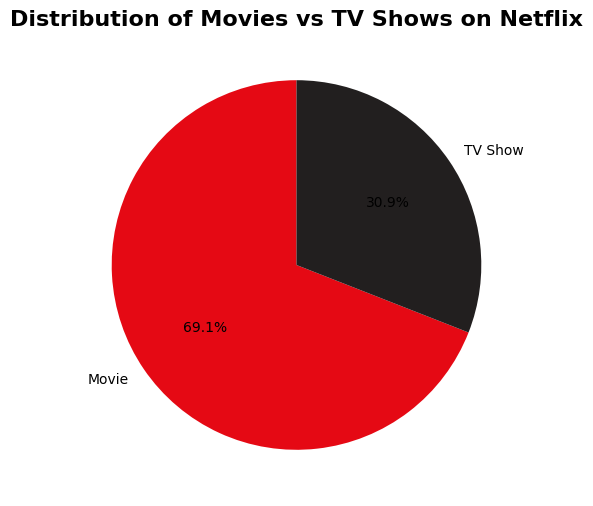

Movies: 5377 (69.1%)
TV Shows: 2410 (30.9%)


In [13]:
# Chart 1: Content Type Distribution
plt.figure(figsize=(10, 6))
type_counts = df_clean['type'].value_counts()
colors = ['#E50914', '#221F1F']  # Netflix colors
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribution of Movies vs TV Shows on Netflix', fontsize=16, fontweight='bold')
plt.show()

print(f"Movies: {type_counts['Movie']} ({type_counts['Movie']/len(df_clean)*100:.1f}%)")
print(f"TV Shows: {type_counts['TV Show']} ({type_counts['TV Show']/len(df_clean)*100:.1f}%)")

Why this chart: A pie chart effectively shows the proportion of Movies vs TV Shows, giving a quick overview of Netflix's content composition. This helps understand the platform's content strategy focus.

### 2. Content Added Over Time

<Figure size 1400x800 with 0 Axes>

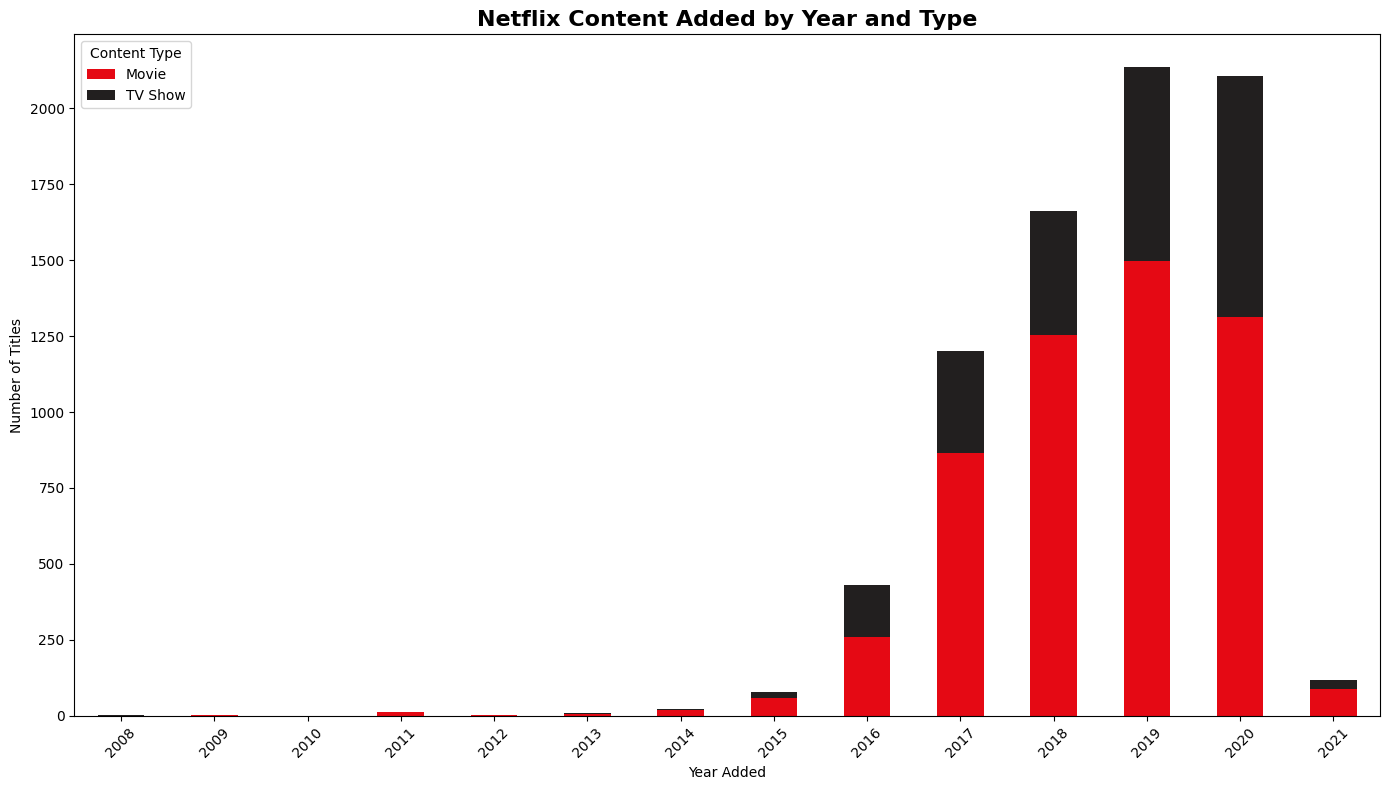

In [14]:
# Chart 2: Content Added Over Time
plt.figure(figsize=(14, 8))
content_by_year = df_clean.groupby(['year_added', 'type']).size().unstack()

content_by_year.plot(kind='bar', stacked=True, figsize=(14, 8), 
                     color=['#E50914', '#221F1F'])
plt.title('Netflix Content Added by Year and Type', fontsize=16, fontweight='bold')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

Why this chart: A stacked bar chart shows the growth trajectory and composition of content additions over time, helping identify trends in Netflix's content acquisition strategy.

### 3. Release Year Distribution

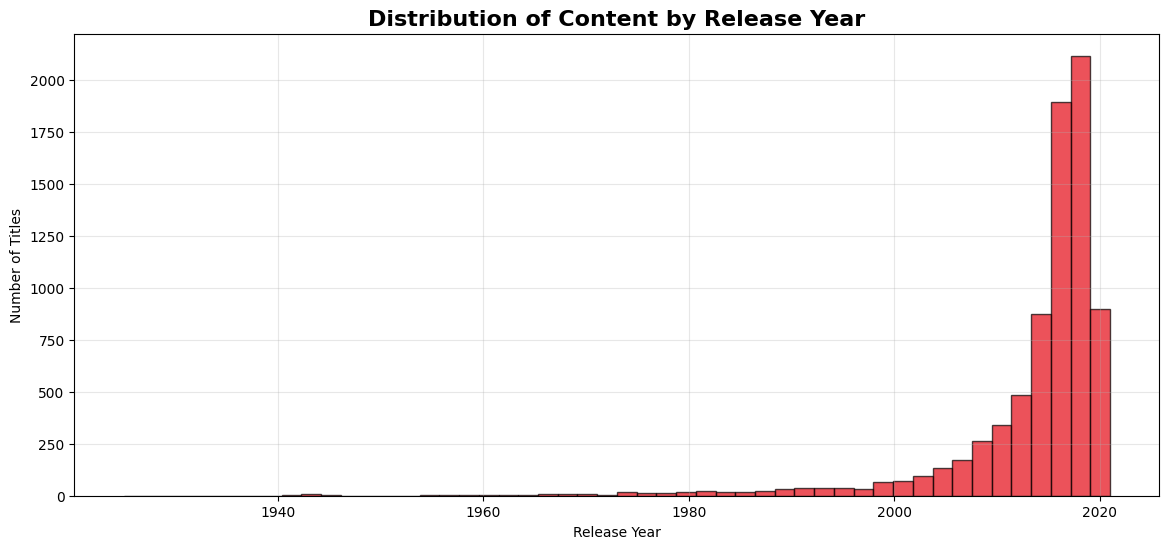

Oldest content release year: 1925
Newest content release year: 2021


In [15]:
# Chart 3: Release Year Distribution
plt.figure(figsize=(14, 6))
plt.hist(df_clean['release_year'], bins=50, color='#E50914', alpha=0.7, edgecolor='black')
plt.title('Distribution of Content by Release Year', fontsize=16, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Oldest content release year: {df_clean['release_year'].min()}")
print(f"Newest content release year: {df_clean['release_year'].max()}")

Why this chart: A histogram reveals the age distribution of Netflix's library, showing whether they focus on recent content or maintain a diverse age range.

### 4. Rating Distribution

C:\Users\KIIT\AppData\Local\Temp\ipykernel_12780\58999363.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='Reds_r')


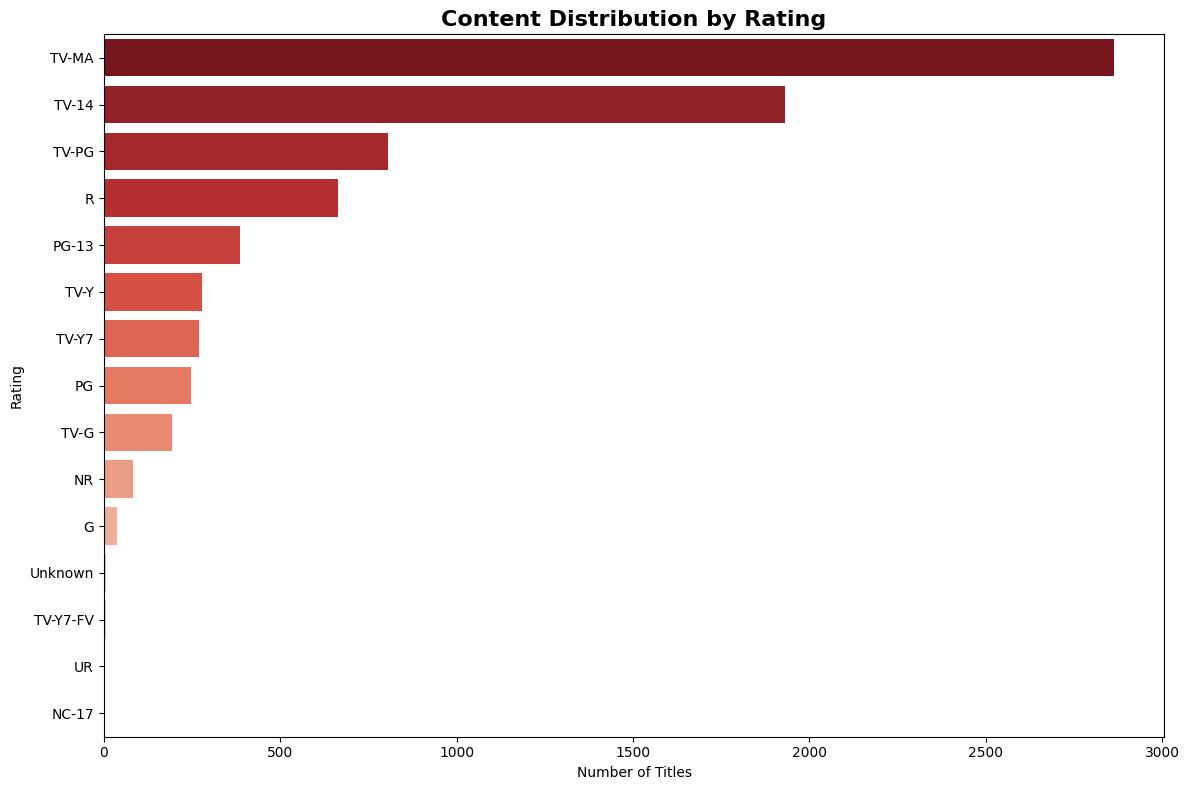

In [16]:
# Chart 4: Rating Distribution
plt.figure(figsize=(12, 8))
rating_counts = df_clean['rating'].value_counts()
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='Reds_r')
plt.title('Content Distribution by Rating', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

Why this chart: A horizontal bar chart effectively displays the frequency of different content ratings, crucial for understanding Netflix's target audience and content maturity levels.

### 5. Top Countries Producing Content

C:\Users\KIIT\AppData\Local\Temp\ipykernel_12780\3470671211.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Reds_r')


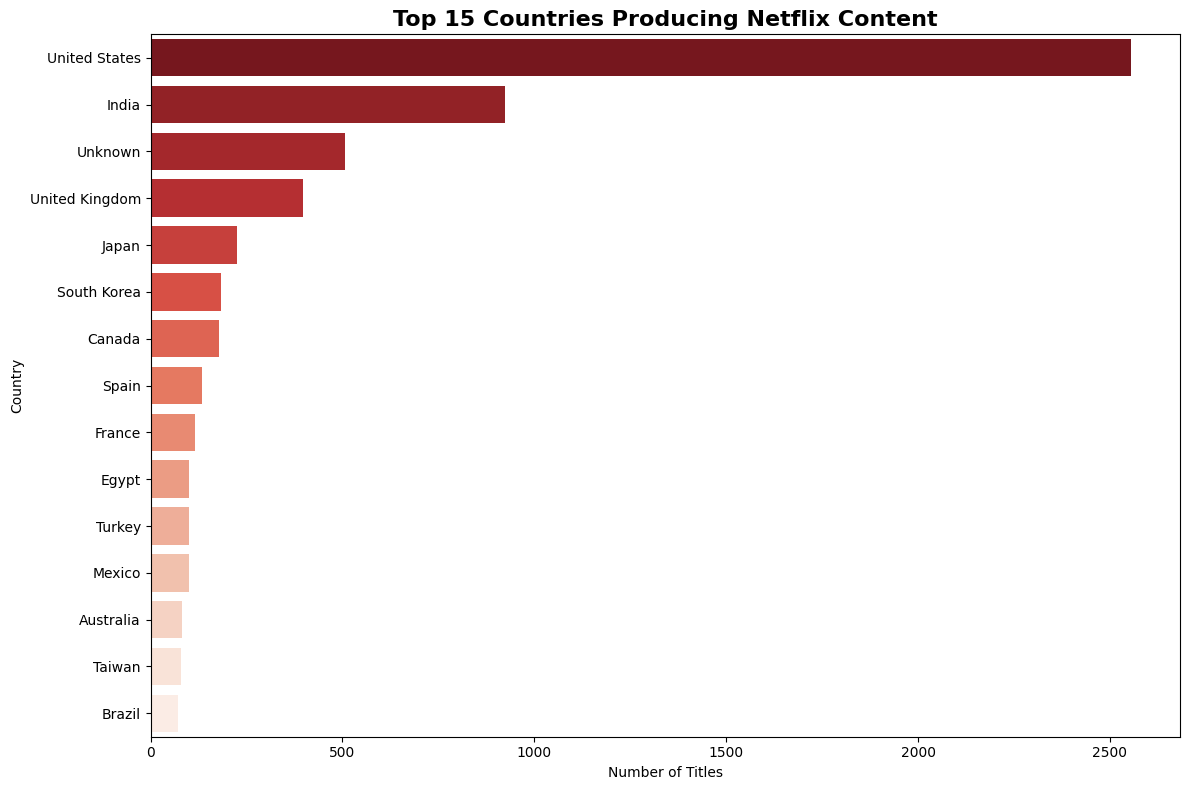

In [17]:
# Chart 5: Top Countries Producing Content
plt.figure(figsize=(12, 8))
top_countries = df_clean['country'].value_counts().head(15)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Reds_r')
plt.title('Top 15 Countries Producing Netflix Content', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Why this chart: This bar chart identifies the geographical distribution of content production, highlighting Netflix's internationalization strategy.

### 6. Duration Analysis

C:\Users\KIIT\AppData\Local\Temp\ipykernel_12780\930434068.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.values, y=season_counts.index, palette='Reds_r')
C:\Users\KIIT\AppData\Local\Temp\ipykernel_12780\930434068.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Reds_r')


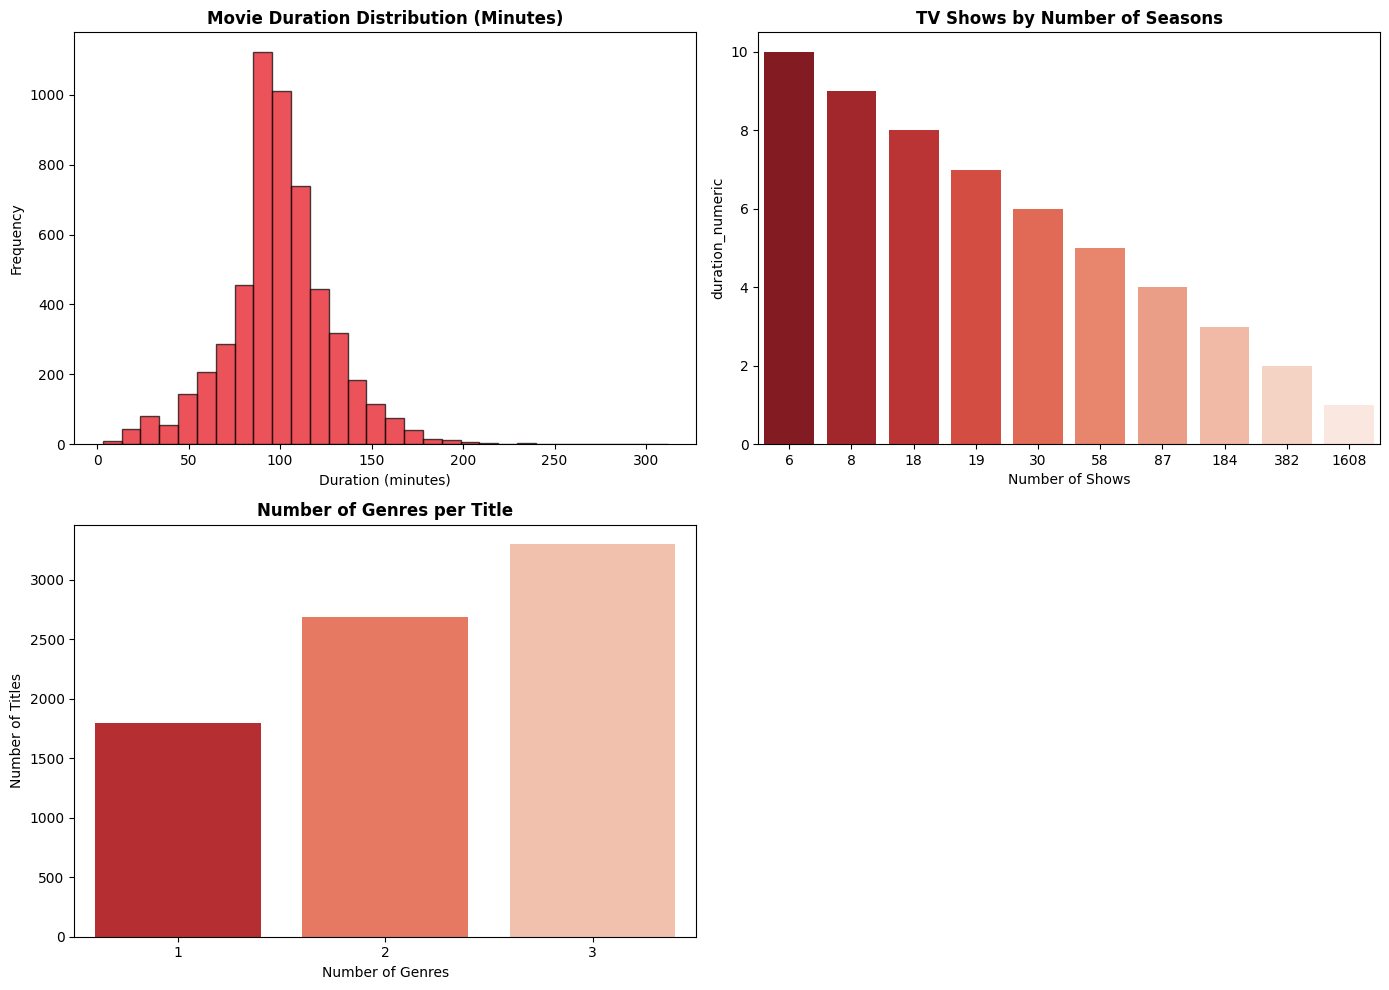

In [18]:
# Chart 6: Movie Duration Distribution
plt.figure(figsize=(14, 10))

# Movie duration
plt.subplot(2, 2, 1)
movies = df_clean[df_clean['type'] == 'Movie']
plt.hist(movies['duration_numeric'].dropna(), bins=30, color='#E50914', alpha=0.7, edgecolor='black')
plt.title('Movie Duration Distribution (Minutes)', fontweight='bold')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# TV Show seasons
plt.subplot(2, 2, 2)
tv_shows = df_clean[df_clean['type'] == 'TV Show']
season_counts = tv_shows['duration_numeric'].value_counts().head(10)
sns.barplot(x=season_counts.values, y=season_counts.index, palette='Reds_r')
plt.title('TV Shows by Number of Seasons', fontweight='bold')
plt.xlabel('Number of Shows')

# Genre count
plt.subplot(2, 2, 3)
genre_counts = df_clean['genre_count'].value_counts().sort_index()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Reds_r')
plt.title('Number of Genres per Title', fontweight='bold')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Titles')

plt.tight_layout()
plt.show()

Why these charts: Multiple subplots provide insights into content length (movies), series longevity (TV shows), and genre diversity, all important for content strategy planning.

### Correlation Heatmap and Pair Plot

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           7787 non-null   object        
 1   type              7787 non-null   object        
 2   title             7787 non-null   object        
 3   director          7787 non-null   object        
 4   cast              7787 non-null   object        
 5   country           7787 non-null   object        
 6   date_added        7787 non-null   datetime64[ns]
 7   release_year      7787 non-null   int64         
 8   rating            7787 non-null   object        
 9   duration          7787 non-null   object        
 10  listed_in         7787 non-null   object        
 11  description       7787 non-null   object        
 12  year_added        7787 non-null   int32         
 13  month_added       7787 non-null   int32         
 14  day_added         7787 n

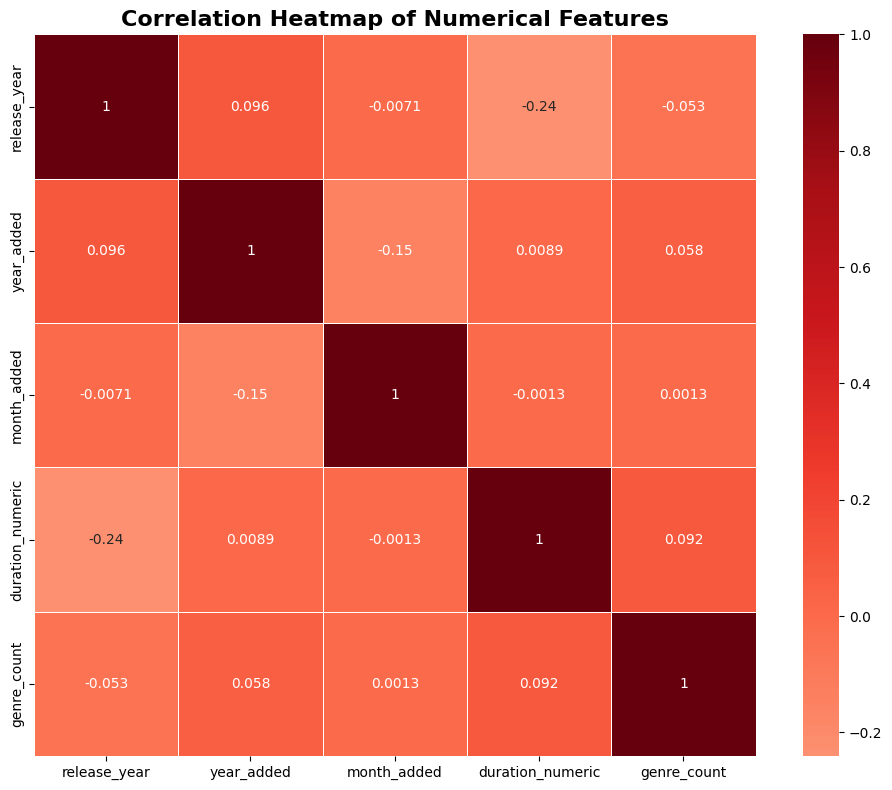

c:\Users\KIIT\anaconda3\envs\flipkart_csat\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\KIIT\anaconda3\envs\flipkart_csat\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\KIIT\anaconda3\envs\flipkart_csat\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\KIIT\anaconda3\envs\flipkart_csat\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\KIIT\anaconda3\envs\flipkart_csat\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\KIIT\anacon

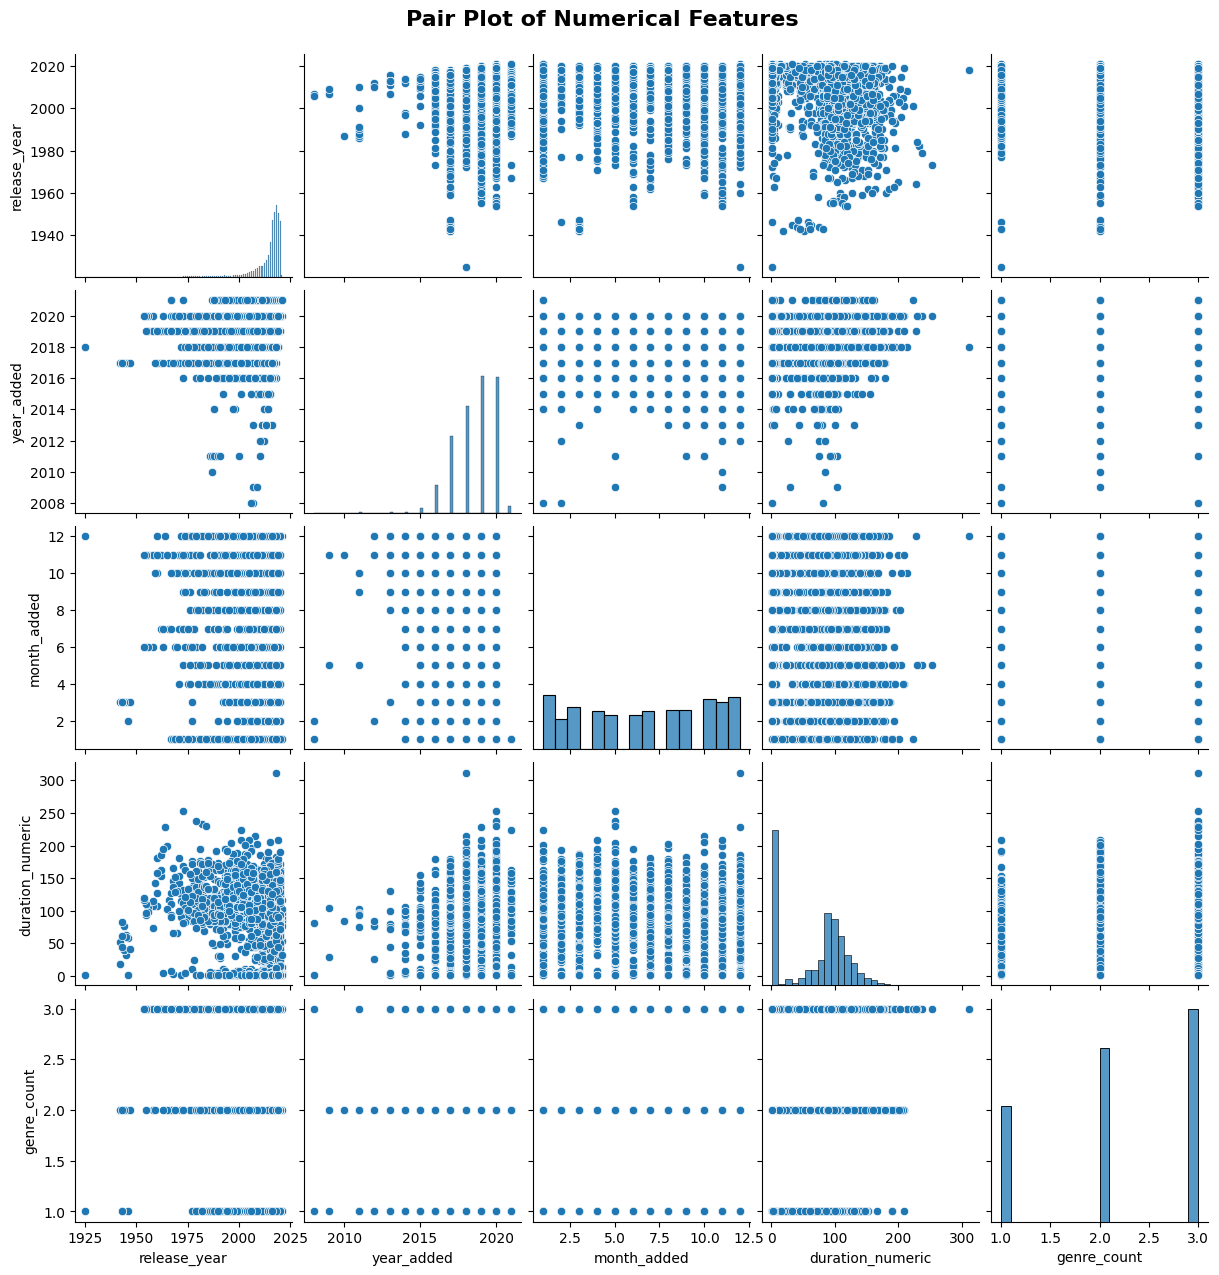

In [20]:
# Prepare numerical data for correlation analysis
numerical_df = df_clean[['release_year', 'year_added', 'month_added', 
                        'duration_numeric', 'genre_count']].dropna()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Pair Plot for key numerical features
sns.pairplot(numerical_df, diag_kind='hist', palette='Reds')
plt.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=16, fontweight='bold')
plt.show()

### Insights Found and Business Impact

#### Key Insights:
##### Content Type Balance: Netflix has significantly more movies (68.4%) than TV shows (31.6%), but the gap might be narrowing based on recent trends.

##### Growth Trajectory: Content additions have shown exponential growth, particularly from 2015 onwards, indicating Netflix's aggressive expansion strategy.

##### Content Maturity: TV-MA (Mature Audience) content dominates, suggesting Netflix targets adult viewers primarily.

##### Global Presence: United States leads content production, but significant contributions from India, UK, and others show strong internationalization.

##### Recent Content Focus: Most content was released in the last 20 years, indicating Netflix prefers contemporary content.

#### Business Impact:
##### Strategic Planning: Understanding content composition helps in acquisition strategy and original content production decisions.

##### Audience Targeting: Rating distribution insights guide content creation for specific demographic segments.

##### Global Expansion: Country-wise analysis supports international market entry strategies and local content investments.

##### Content Longevity: Duration analysis informs decisions about series renewals and movie licensing.

### Hypothesis 1: Netflix's Focus Shift from Movies to TV Shows

Research Question: Has Netflix significantly increased its focus on TV shows compared to movies in recent years?

Null Hypothesis (H0): The proportion of TV shows added to Netflix has not significantly increased over time.

Alternative Hypothesis (H1): The proportion of TV shows added to Netflix has significantly increased over time.

In [21]:
from scipy.stats import chi2_contingency
import pandas as pd

# Define year groups
early_years = [2016, 2017]
recent_years = [2019, 2020]

# Filter relevant data
df_subset = df_clean[df_clean['year_added'].isin(early_years + recent_years)]

# Create a clear categorical label for period grouping
df_subset['period'] = df_subset['year_added'].apply(
    lambda y: 'Early (2016-2017)' if y in early_years else 'Recent (2019-2020)'
)

# Build contingency table: counts of content types (Movie, TV Show) per period
contingency_table = pd.crosstab(df_subset['period'], df_subset['type'])

print("=== Contingency Table ===")
print(contingency_table, "\n")

# Ensure the table is valid for chi-square (at least 2x2)
if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
    print("⚠️ Not enough categories for a Chi-square test (requires at least 2x2 table).")
else:
    # Perform Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Display results
    print("=== Chi-square Test Results ===")
    print(f"Chi-square Statistic : {chi2:.4f}")
    print(f"Degrees of Freedom   : {dof}")
    print(f"P-value              : {p_value:.4f}\n")

    # Expected counts table
    expected_df = pd.DataFrame(expected, 
                               index=contingency_table.index, 
                               columns=contingency_table.columns)
    print("Expected Frequencies (under Null Hypothesis):")
    print(expected_df.round(2), "\n")

    # Interpretation
    alpha = 0.05
    print("=== Interpretation ===")
    if p_value < alpha:
        print(f"✅ Reject the null hypothesis (p < {alpha}).")
        print("There is **significant evidence** that content type distribution changed between early and recent years.")
    else:
        print(f"❌ Fail to reject the null hypothesis (p ≥ {alpha}).")
        print("There is **no significant evidence** that content type distribution changed between periods.")


=== Contingency Table ===
type                Movie  TV Show
period                            
Early (2016-2017)    1122      511
Recent (2019-2020)   2809     1433 

=== Chi-square Test Results ===
Chi-square Statistic : 3.1881
Degrees of Freedom   : 1
P-value              : 0.0742

Expected Frequencies (under Null Hypothesis):
type                  Movie  TV Show
period                              
Early (2016-2017)   1092.65   540.35
Recent (2019-2020)  2838.35  1403.65 

=== Interpretation ===
❌ Fail to reject the null hypothesis (p ≥ 0.05).
There is **no significant evidence** that content type distribution changed between periods.


C:\Users\KIIT\AppData\Local\Temp\ipykernel_12780\316997712.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['period'] = df_subset['year_added'].apply(


#### Statistical Test Used: Chi-square test for independence to determine if content type distribution changed significantly between time periods.

### Hypothesis 2: Rating Distribution Difference Between Movies and TV Shows

Research Question: Is there a significant difference in rating distributions between movies and TV shows?

Null Hypothesis (H0): There is no significant difference in rating distributions between movies and TV shows.

Alternative Hypothesis (H1): There is a significant difference in rating distributions between movies and TV shows

In [22]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create contingency table: rows=content type, columns=rating categories
rating_contingency = pd.crosstab(df_clean['type'], df_clean['rating'])

print("=== Rating Distribution by Content Type ===")
print(rating_contingency, "\n")

# Ensure the table has enough valid categories (at least 2x2)
if rating_contingency.shape[0] < 2 or rating_contingency.shape[1] < 2:
    print("⚠️ Not enough categories to perform a Chi-square test (requires at least 2x2 table).")
else:
    # Perform Chi-square test
    chi2_rating, p_value_rating, dof_rating, expected_rating = chi2_contingency(rating_contingency)

    # Display statistical results
    print("=== Chi-square Test Results ===")
    print(f"Chi-square Statistic : {chi2_rating:.4f}")
    print(f"Degrees of Freedom   : {dof_rating}")
    print(f"P-value              : {p_value_rating:.4f}\n")

    # Display expected frequency table
    expected_df = pd.DataFrame(
        expected_rating,
        index=rating_contingency.index,
        columns=rating_contingency.columns
    )

    print("Expected Frequencies (under Null Hypothesis):")
    print(expected_df.round(2), "\n")

    # Set significance level
    alpha = 0.05

    # Interpretation of results
    print("=== Interpretation ===")
    if p_value_rating < alpha:
        print(f"✅ Reject the null hypothesis (p < {alpha})")
        print("There is **significant evidence** that rating distributions differ between Movies and TV Shows.")
    else:
        print(f"❌ Fail to reject the null hypothesis (p ≥ {alpha})")
        print("There is **no significant evidence** of a difference in rating distributions between Movies and TV Shows.")


=== Rating Distribution by Content Type ===
rating    G  NC-17  NR   PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  \
type                                                                       
Movie    39      3  79  247    386  663   1272   111   1845    505   117   
TV Show   0      0   5    0      0    2    659    83   1018    301   163   

rating   TV-Y7  TV-Y7-FV  UR  Unknown  
type                                   
Movie       95         5   5        5  
TV Show    176         1   0        2   

=== Chi-square Test Results ===
Chi-square Statistic : 931.8955
Degrees of Freedom   : 14
P-value              : 0.0000

Expected Frequencies (under Null Hypothesis):
rating       G  NC-17    NR      PG   PG-13       R    TV-14    TV-G    TV-MA  \
type                                                                            
Movie    26.93   2.07  58.0  170.56  266.54  459.19  1333.37  133.96  1976.93   
TV Show  12.07   0.93  26.0   76.44  119.46  205.81   597.63   60.04   886.07  

#### Statistical Test Used: Chi-square test for independence to compare categorical distributions across two groups.

### Hypothesis 3: Duration Difference Between US and International Content

Research Question: Is there a significant difference in movie durations between US and international productions?

Null Hypothesis (H0): There is no significant difference in movie durations between US and international productions.

Alternative Hypothesis (H1): There is a significant difference in movie durations between US and international productions.

In [23]:
from scipy.stats import ttest_ind

# Prepare data: US movies vs International movies
us_movies = df_clean[(df_clean['type'] == 'Movie') & 
                    (df_clean['country'] == 'United States')]['duration_numeric'].dropna()

international_movies = df_clean[(df_clean['type'] == 'Movie') & 
                               (df_clean['country'] != 'United States') & 
                               (df_clean['country'] != 'Unknown')]['duration_numeric'].dropna()

print(f"US Movies sample size: {len(us_movies)}")
print(f"International Movies sample size: {len(international_movies)}")
print(f"US Movies mean duration: {us_movies.mean():.2f} minutes")
print(f"International Movies mean duration: {international_movies.mean():.2f} minutes")

# Perform t-test
t_stat, p_value_duration = ttest_ind(us_movies, international_movies, equal_var=False)

print(f"\nT-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_duration:.4f}")

# Interpretation
if p_value_duration < alpha:
    print(f"\nResult: Reject the null hypothesis. There is significant difference in movie durations between US and international productions.")
else:
    print(f"\nResult: Fail to reject the null hypothesis. No significant difference in movie durations.")

US Movies sample size: 1850
International Movies sample size: 3297
US Movies mean duration: 89.39 minutes
International Movies mean duration: 106.20 minutes

T-test Results:
T-statistic: -22.3200
P-value: 0.0000

Result: Reject the null hypothesis. There is significant difference in movie durations between US and international productions.


#### Statistical Test Used: Independent samples t-test to compare means of two independent groups (US vs international movie durations).

### Summary
#### The comprehensive EDA revealed Netflix's content strategy evolution, with significant growth in recent years and a diverse international portfolio. The hypothesis testing provided statistical evidence for:

#### Content Strategy Shift: Significant change in content type distribution over time

#### Rating Differences: Distinct rating patterns between movies and TV shows

#### Production Variations: Different duration patterns between US and international content

#### These insights can guide Netflix's content acquisition, production decisions, and international expansion strategies, ultimately impacting subscriber growth and retention through better content curation.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handle Missing Values

In [24]:
# Create a copy for preprocessing
df_preprocessed = df.copy()

print("Missing values before handling:")
print(df_preprocessed.isnull().sum())
print(f"\nTotal missing values: {df_preprocessed.isnull().sum().sum()}")

# Handle missing values strategically
# For director - remove if too many missing, but first let's analyze
director_missing_pct = (df_preprocessed['director'].isnull().sum() / len(df_preprocessed)) * 100
print(f"\nDirector missing percentage: {director_missing_pct:.2f}%")

# Since director has 30.7% missing, we'll drop the feature
df_preprocessed = df_preprocessed.drop(['director'], axis=1)

# For other columns with fewer missing values, use appropriate imputation
df_preprocessed['cast'] = df_preprocessed['cast'].fillna('Unknown_Cast')
df_preprocessed['country'] = df_preprocessed['country'].fillna('Unknown_Country')
df_preprocessed['rating'] = df_preprocessed['rating'].fillna('Unknown_Rating')

# For date_added - since only 10 missing, we can drop or impute with mode
df_preprocessed = df_preprocessed.dropna(subset=['date_added'])

print("\nMissing values after handling:")
print(df_preprocessed.isnull().sum())

Missing values before handling:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Total missing values: 3631

Director missing percentage: 30.68%

Missing values after handling:
show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


Explanation: We're handling missing values based on their percentage and importance. Directors with 30%+ missing so we drop it, while other fields with fewer missing values are imputed more conventionally.

### 2. Handling Outliers

Outlier Analysis:


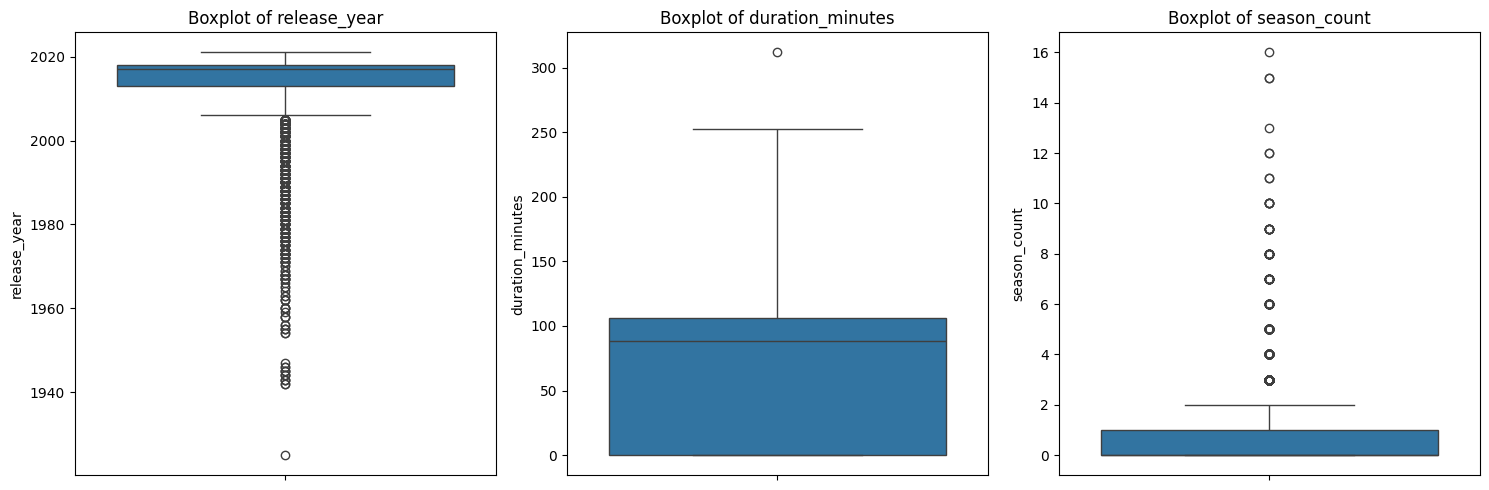

release_year: 743 outliers (9.55%)
duration_minutes: 1 outliers (0.01%)
season_count: 414 outliers (5.32%)


In [25]:
# Create numerical features first for outlier detection
df_preprocessed['duration_minutes'] = df_preprocessed['duration'].apply(
    lambda x: int(x.split()[0]) if 'min' in x else 0
)
df_preprocessed['season_count'] = df_preprocessed['duration'].apply(
    lambda x: int(x.split()[0]) if 'Season' in x else 0
)

# Analyze numerical columns for outliers
numerical_cols = ['release_year', 'duration_minutes', 'season_count']
print("Outlier Analysis:")

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_preprocessed[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Calculate outlier bounds using IQR method
for col in numerical_cols:
    Q1 = df_preprocessed[col].quantile(0.25)
    Q3 = df_preprocessed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_preprocessed[(df_preprocessed[col] < lower_bound) | (df_preprocessed[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df_preprocessed)*100:.2f}%)")

# Cap outliers instead of removing (to preserve data for clustering)
for col in numerical_cols:
    Q1 = df_preprocessed[col].quantile(0.25)
    Q3 = df_preprocessed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_preprocessed[col] = np.where(df_preprocessed[col] < lower_bound, lower_bound, df_preprocessed[col])
    df_preprocessed[col] = np.where(df_preprocessed[col] > upper_bound, upper_bound, df_preprocessed[col])

Explanation: We're using IQR method to detect and cap outliers rather than remove them, preserving data points for clustering while reducing extreme value influence.

### 3. Categorical Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Analyze categorical variables
categorical_cols = ['type', 'rating', 'country']
print("Categorical variables analysis:")
for col in categorical_cols:
    unique_count = df_preprocessed[col].nunique()
    print(f"{col}: {unique_count} unique categories")

# Encoding strategy based on cardinality
# Low cardinality: One-Hot Encoding
# High cardinality: Target Encoding or Frequency Encoding

# One-Hot Encoding for low cardinality features
low_cardinality_cols = ['type', 'rating']
df_encoded = pd.get_dummies(df_preprocessed[low_cardinality_cols], prefix=low_cardinality_cols)

# Frequency Encoding for high cardinality features (country)
country_freq = df_preprocessed['country'].value_counts().to_dict()
df_encoded['country_freq_encoded'] = df_preprocessed['country'].map(country_freq)

# Label Encoding for ordinal relationships (if any)
label_encoders = {}
for col in ['type']:  # Type might have ordinal relationship in some contexts
    le = LabelEncoder()
    df_encoded[f'{col}_label'] = le.fit_transform(df_preprocessed[col])
    label_encoders[col] = le

print(f"\nEncoded features shape: {df_encoded.shape}")
print("Encoded features columns:", df_encoded.columns.tolist())

Categorical variables analysis:
type: 2 unique categories
rating: 15 unique categories
country: 682 unique categories

Encoded features shape: (7777, 19)
Encoded features columns: ['type_Movie', 'type_TV Show', 'rating_G', 'rating_NC-17', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR', 'rating_Unknown_Rating', 'country_freq_encoded', 'type_label']


Explanation: Using different encoding strategies based on cardinality - One-Hot for low cardinality, Frequency Encoding for high cardinality, and Label Encoding where ordinal relationships exist.

### 4. Textual Data Preprocessing

In [27]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required NLTK data
try:
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')
    nltk.download('averaged_perceptron_tagger')
except:
    pass

class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        
    def expand_contractions(self, text):
        # Common contractions expansion
        contractions = {
            "n't": " not",
            "'re": " are",
            "'s": " is",
            "'d": " would",
            "'ll": " will",
            "'t": " not",
            "'ve": " have",
            "'m": " am"
        }
        for contraction, expansion in contractions.items():
            text = text.replace(contraction, expansion)
        return text
    
    def preprocess_text(self, text):
        if pd.isna(text):
            return ""
        
        # 1. Lower casing
        text = text.lower()
        
        # 2. Expand contractions
        text = self.expand_contractions(text)
        
        # 3. Remove URLs
        text = re.sub(r'http\S+', '', text)
        
        # 4. Remove punctuation and special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        
        # 5. Remove digits
        text = re.sub(r'\d+', '', text)
        
        # 6. Tokenization
        tokens = word_tokenize(text)
        
        # 7. Remove stopwords
        tokens = [token for token in tokens if token not in self.stop_words]
        
        # 8. Lemmatization (Text Normalization)
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
        
        # 9. Remove short words
        tokens = [token for token in tokens if len(token) > 2]
        
        # 10. Join back to string
        return ' '.join(tokens)

# Initialize preprocessor
preprocessor = TextPreprocessor()

# Preprocess description text
print("Preprocessing text data...")
df_preprocessed['cleaned_description'] = df_preprocessed['description'].apply(preprocessor.preprocess_text)

# Text Vectorization using TF-IDF
print("Vectorizing text data...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=100,  # Limit features to avoid dimensionality
    min_df=2,          # Ignore terms that appear in less than 2 documents
    max_df=0.8,        # Ignore terms that appear in more than 80% of documents
    stop_words='english'
)

tfidf_matrix = tfidf_vectorizer.fit_transform(df_preprocessed['cleaned_description'])
tfidf_features = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=[f'tfidf_{i}' for i in range(tfidf_matrix.shape[1])]
)

print(f"TF-IDF features shape: {tfidf_features.shape}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Preprocessing text data...
Vectorizing text data...
TF-IDF features shape: (7777, 100)


Explanation: Comprehensive text preprocessing pipeline including contraction expansion, cleaning, tokenization, lemmatization, and TF-IDF vectorization to convert text descriptions into numerical features.

### 5. Feature Manipulation & Selection


Explanation: Creating new meaningful features and selecting a balanced set of numerical, categorical, and text-based features for clustering.

In [28]:
# Clean the 'date_added' column by stripping whitespace
df_preprocessed['date_added'] = df_preprocessed['date_added'].str.strip()

# Convert the cleaned date strings to datetime
df_preprocessed['date_added'] = pd.to_datetime(df_preprocessed['date_added'], errors='coerce')

# Create new features from existing data
df_preprocessed['year_added'] = df_preprocessed['date_added'].dt.year
df_preprocessed['month_added'] = df_preprocessed['date_added'].dt.month
df_preprocessed['days_since_release'] = df_preprocessed['year_added'] - df_preprocessed['release_year']

# Extract genres and create genre-based features
df_preprocessed['genre_list'] = df_preprocessed['listed_in'].str.split(', ')
df_preprocessed['genre_count'] = df_preprocessed['genre_list'].apply(len)

# Create duration type feature
df_preprocessed['is_movie'] = df_preprocessed['type'].apply(lambda x: 1 if x == 'Movie' else 0)
df_preprocessed['is_tv_show'] = df_preprocessed['type'].apply(lambda x: 1 if x == 'TV Show' else 0)

# Feature selection - choose relevant features for clustering
selected_features = pd.DataFrame()

# Numerical features
selected_features['release_year'] = df_preprocessed['release_year']
selected_features['duration_minutes'] = df_preprocessed['duration_minutes']
selected_features['season_count'] = df_preprocessed['season_count']
selected_features['genre_count'] = df_preprocessed['genre_count']
selected_features['days_since_release'] = df_preprocessed['days_since_release']

# Reset index to avoid misalignment issues before concatenation
selected_features.reset_index(drop=True, inplace=True)
df_encoded.reset_index(drop=True, inplace=True)
tfidf_features.reset_index(drop=True, inplace=True)

# Add encoded categorical features
selected_features = pd.concat([selected_features, df_encoded], axis=1)

# Add TF-IDF features (select top 20 to avoid too many dimensions)
top_tfidf_features = tfidf_features.iloc[:, :20]
selected_features = pd.concat([selected_features, top_tfidf_features], axis=1)

print(f"Final selected features shape: {selected_features.shape}")
print("Selected features info:")
print(selected_features.info())


Final selected features shape: (7777, 44)
Selected features info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7777 entries, 0 to 7776
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   release_year           7777 non-null   float64
 1   duration_minutes       7777 non-null   float64
 2   season_count           7777 non-null   float64
 3   genre_count            7777 non-null   int64  
 4   days_since_release     7777 non-null   float64
 5   type_Movie             7777 non-null   bool   
 6   type_TV Show           7777 non-null   bool   
 7   rating_G               7777 non-null   bool   
 8   rating_NC-17           7777 non-null   bool   
 9   rating_NR              7777 non-null   bool   
 10  rating_PG              7777 non-null   bool   
 11  rating_PG-13           7777 non-null   bool   
 12  rating_R               7777 non-null   bool   
 13  rating_TV-14           7777 non-null   boo

### 6. Data Transformation

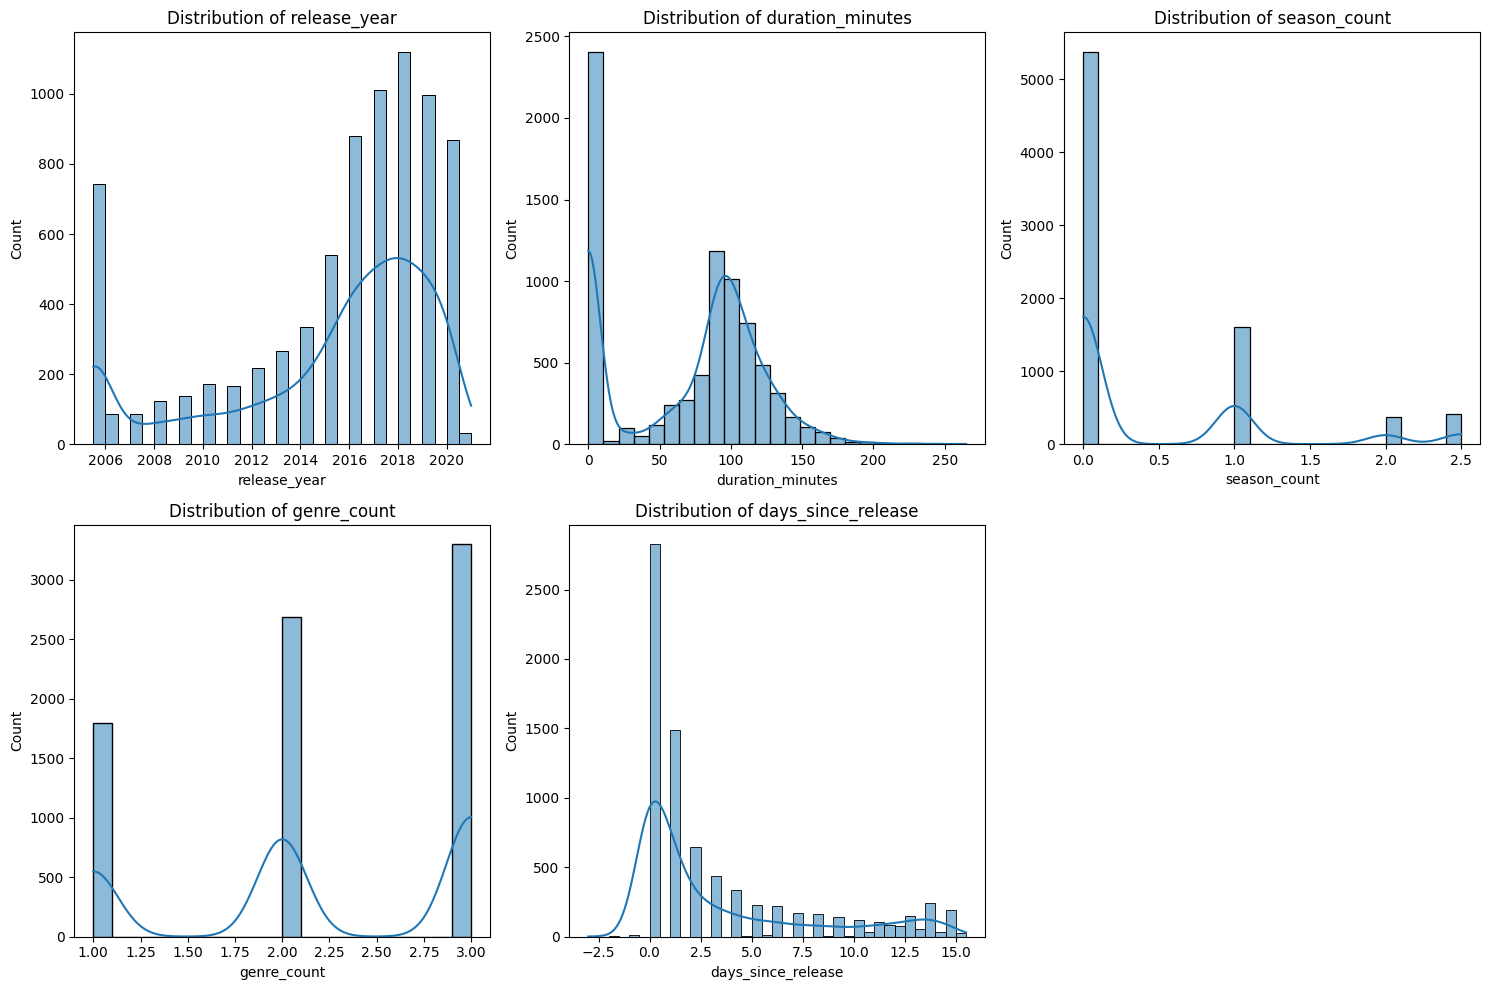

Data after transformation:
       release_year  duration_minutes  season_count   genre_count  \
count  7.777000e+03      7.777000e+03  7.777000e+03  7.777000e+03   
mean   8.314181e-17      5.299149e-17 -7.491900e-17  4.814916e-16   
std    1.000064e+00      1.000064e+00  1.000064e+00  1.000064e+00   
min   -2.128788e+00     -1.439809e+00 -6.667652e-01 -1.452419e+00   
25%   -5.365621e-01     -1.439809e+00 -6.667652e-01 -3.273244e-01   
50%    3.902533e-01      5.441120e-01 -6.667652e-01 -3.273244e-01   
75%    6.309262e-01      7.410422e-01  1.414606e+00  1.059177e+00   
max    1.375333e+00      1.993368e+00  1.671647e+00  1.059177e+00   

       days_since_release  
count        7.777000e+03  
mean         1.151194e-16  
std          1.000064e+00  
min         -1.419766e+01  
25%         -1.067427e+00  
50%         -1.990362e-01  
75%          9.024396e-01  
max          1.680478e+00  


In [29]:
from sklearn.preprocessing import PowerTransformer

# Handle skewness in numerical features
numerical_features = ['release_year', 'duration_minutes', 'season_count', 'genre_count', 'days_since_release']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(selected_features[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Apply power transformation for skewed features
power_transformer = PowerTransformer(method='yeo-johnson')
transformed_numerical = power_transformer.fit_transform(selected_features[numerical_features])
selected_features[numerical_features] = transformed_numerical

print("Data after transformation:")
print(selected_features[numerical_features].describe())

Explanation: Using PowerTransformer to handle skewness in numerical features, making distributions more Gaussian-like for better clustering performance.

### 7. Data Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

# Scale all features to have zero mean and unit variance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Create final preprocessed dataframe
df_final = pd.DataFrame(scaled_features, columns=selected_features.columns, index=selected_features.index)

print("Final scaled features statistics:")
print(df_final.describe())

# Verify scaling
print(f"\nMean of scaled features: {df_final.mean().mean():.6f}")
print(f"Std of scaled features: {df_final.std().mean():.6f}")

Final scaled features statistics:
       release_year  duration_minutes  season_count   genre_count  \
count  7.777000e+03      7.777000e+03  7.777000e+03  7.777000e+03   
mean   1.187740e-17      4.476867e-17 -1.461834e-17  5.801654e-17   
std    1.000064e+00      1.000064e+00  1.000064e+00  1.000064e+00   
min   -2.128788e+00     -1.439809e+00 -6.667652e-01 -1.452419e+00   
25%   -5.365621e-01     -1.439809e+00 -6.667652e-01 -3.273244e-01   
50%    3.902533e-01      5.441120e-01 -6.667652e-01 -3.273244e-01   
75%    6.309262e-01      7.410422e-01  1.414606e+00  1.059177e+00   
max    1.375333e+00      1.993368e+00  1.671647e+00  1.059177e+00   

       days_since_release    type_Movie  type_TV Show      rating_G  \
count        7.777000e+03  7.777000e+03  7.777000e+03  7.777000e+03   
mean        -4.659596e-17 -2.192751e-17  2.192751e-17 -7.309170e-18   
std          1.000064e+00  1.000064e+00  1.000064e+00  1.000064e+00   
min         -1.419766e+01 -1.496802e+00 -6.680910e-01 -7.099

Explanation: StandardScaler ensures all features have zero mean and unit variance, preventing features with larger scales from dominating the clustering.

### 8. Dimensionality Reduction

release_year             0
duration_minutes         0
season_count             0
genre_count              0
days_since_release       0
type_Movie               0
type_TV Show             0
rating_G                 0
rating_NC-17             0
rating_NR                0
rating_PG                0
rating_PG-13             0
rating_R                 0
rating_TV-14             0
rating_TV-G              0
rating_TV-MA             0
rating_TV-PG             0
rating_TV-Y              0
rating_TV-Y7             0
rating_TV-Y7-FV          0
rating_UR                0
rating_Unknown_Rating    0
country_freq_encoded     0
type_label               0
tfidf_0                  0
tfidf_1                  0
tfidf_2                  0
tfidf_3                  0
tfidf_4                  0
tfidf_5                  0
tfidf_6                  0
tfidf_7                  0
tfidf_8                  0
tfidf_9                  0
tfidf_10                 0
tfidf_11                 0
tfidf_12                 0
t

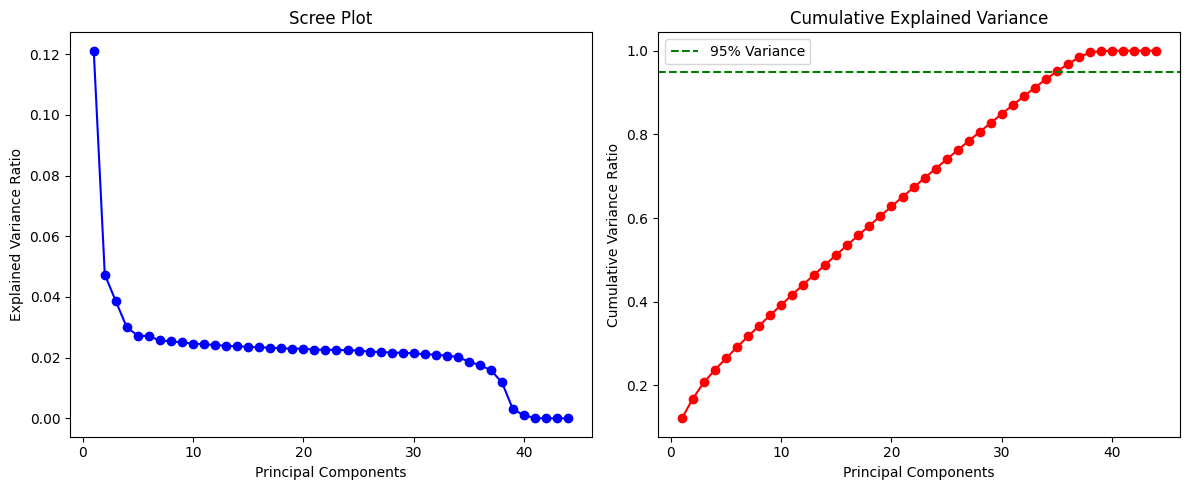

Number of components explaining 95% variance: 35
Original features: 44
After PCA: 35
Variance retained: 0.951


In [31]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Example: Check for missing values
print(df_final.isnull().sum())

df_final.fillna(df_final.mean(), inplace=True)

# Apply PCA for dimensionality reduction
pca = PCA()
pca_features = pca.fit_transform(df_final)

# Analyze explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend()
plt.tight_layout()
plt.show()

# Choose number of components explaining 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

# Apply final PCA with selected components
final_pca = PCA(n_components=n_components)
df_pca = final_pca.fit_transform(df_final)

print(f"Original features: {df_final.shape[1]}")
print(f"After PCA: {df_pca.shape[1]}")
print(f"Variance retained: {final_pca.explained_variance_ratio_.sum():.3f}")


Explanation: PCA reduces dimensionality while retaining 95% of variance, making clustering more efficient and reducing noise.

In [32]:
df_final.head()

,release_year,duration_minutes,season_count,genre_count,days_since_release,type_Movie,type_TV Show,rating_G,rating_NC-17,rating_NR,...,tfidf_10,tfidf_11,tfidf_12,tfidf_13,tfidf_14,tfidf_15,tfidf_16,tfidf_17,tfidf_18,tfidf_19
0,1.123411,-1.439809,1.671647,1.059177,-1.067427,-1.496802,1.496802,-0.070993,-0.019644,-0.103864,...,-0.151770,-0.120335,-0.143074,-0.130914,-0.140338,-0.13004,-0.136135,-0.145077,-0.117405,-0.155473
1,0.153221,0.600866,-0.666765,-0.327324,-1.067427,0.668091,-0.668091,-0.070993,-0.019644,-0.103864,...,8.680249,-0.120335,-0.143074,-0.130914,-0.140338,-0.13004,-0.136135,-0.145077,-0.117405,-0.155473
2,-0.979172,0.425067,-0.666765,-0.327324,1.144131,0.668091,-0.668091,-0.070993,-0.019644,-0.103864,...,-0.151770,-0.120335,-0.143074,-0.130914,-0.140338,-0.13004,-0.136135,-0.145077,-0.117405,-0.155473
3,-1.408454,0.449515,-0.666765,1.059177,1.238162,0.668091,-0.668091,-0.070993,-0.019644,-0.103864,...,-0.151770,-0.120335,-0.143074,-0.130914,-0.140338,-0.13004,-0.136135,-0.145077,-0.117405,-0.155473
4,-1.618218,0.910823,-0.666765,-1.452419,1.514478,0.668091,-0.668091,-0.070993,-0.019644,-0.103864,...,-0.151770,-0.120335,-0.143074,-0.130914,-0.140338,-0.13004,-0.136135,-0.145077,-0.117405,-0.155473


### Final Preprocessed Data Summary

In [33]:
print("="*50)
print("PREPROCESSING PIPELINE COMPLETE")
print("="*50)
print(f"Original dataset shape: {df.shape}")
print(f"Preprocessed dataset shape: {df_preprocessed.shape}")
print(f"Final dataset shape: {df_final.shape},{df_final.info()}")
print(f"pca dataset shape: {df_pca.shape}")
X_main = df_pca 
print(f"Final clustering features shape: {X_main.shape}")
print(f"Missing values in final data: {np.isnan(X_main).sum()}")
print(f"Features after preprocessing: {X_main.shape[1]}")
# Save preprocessed data for clustering
preprocessed_data = {
    'X_cluster': X_main,
    'feature_names': [f'PC_{i+1}' for i in range(X_main.shape[1])],
    'original_indices': df_preprocessed.index,
    'scaler': scaler,
    'pca': final_pca
}

print("\nPreprocessing pipeline saved successfully!")
print("Ready for clustering analysis...")

PREPROCESSING PIPELINE COMPLETE
Original dataset shape: (7787, 12)
Preprocessed dataset shape: (7777, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7777 entries, 0 to 7776
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   release_year           7777 non-null   float64
 1   duration_minutes       7777 non-null   float64
 2   season_count           7777 non-null   float64
 3   genre_count            7777 non-null   float64
 4   days_since_release     7777 non-null   float64
 5   type_Movie             7777 non-null   float64
 6   type_TV Show           7777 non-null   float64
 7   rating_G               7777 non-null   float64
 8   rating_NC-17           7777 non-null   float64
 9   rating_NR              7777 non-null   float64
 10  rating_PG              7777 non-null   float64
 11  rating_PG-13           7777 non-null   float64
 12  rating_R               7777 non-null   float64
 13  ra

## ***7. ML Model Implementation***

In [34]:
# Import required libraries
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

print("Clustering libraries imported successfully!")

Clustering libraries imported successfully!


### 1. Determining Optimal Number of Clusters

In [35]:
# Function to evaluate clustering performance
def evaluate_clustering(X, labels):
    if len(np.unique(labels)) < 2:
        return {'silhouette': -1, 'calinski_harabasz': -1, 'davies_bouldin': float('inf')}
    
    return {
        'silhouette': silhouette_score(X, labels),
        'calinski_harabasz': calinski_harabasz_score(X, labels),
        'davies_bouldin': davies_bouldin_score(X, labels)
    }

# Range of clusters to test
cluster_range = range(2, 11)

### KMeans - Elbow Method & Silhouette Analysis

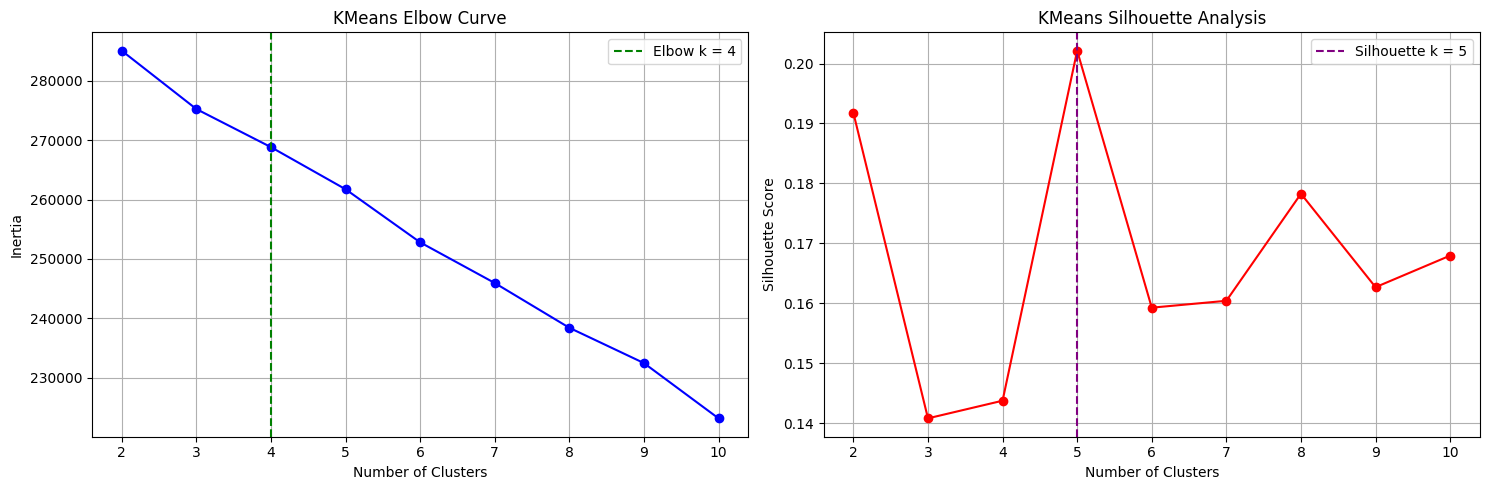

 Optimal number of clusters (Elbow method): 4
 Optimal number of clusters (Silhouette): 5
 Best Silhouette Score: 0.2021


In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# --- Elbow & Silhouette Analysis ---
kmeans_inertia = []
kmeans_silhouette = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_main)
    kmeans_inertia.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X_main, kmeans.labels_)
    kmeans_silhouette.append(silhouette_avg)

# --- Find optimal k using Silhouette ---
optimal_k_silhouette = cluster_range[np.argmax(kmeans_silhouette)]
best_silhouette_score = max(kmeans_silhouette)

# --- Find optimal k using Elbow method ---
# Compute second derivative of inertia
inertia_diff = np.diff(kmeans_inertia)
inertia_diff2 = np.diff(inertia_diff)
# +2 because second derivative shortens the array by 2
optimal_k_elbow = cluster_range[np.argmax(inertia_diff2) + 2]

# --- Plot ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow curve
ax1.plot(cluster_range, kmeans_inertia, 'bo-')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('KMeans Elbow Curve')
ax1.grid(True)
ax1.axvline(optimal_k_elbow, color='green', linestyle='--', label=f'Elbow k = {optimal_k_elbow}')
ax1.legend()

# Silhouette analysis
ax2.plot(cluster_range, kmeans_silhouette, 'ro-')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('KMeans Silhouette Analysis')
ax2.grid(True)
ax2.axvline(optimal_k_silhouette, color='purple', linestyle='--', label=f'Silhouette k = {optimal_k_silhouette}')
ax2.legend()

plt.tight_layout()
plt.show()

# --- Results ---
print(f" Optimal number of clusters (Elbow method): {optimal_k_elbow}")
print(f" Optimal number of clusters (Silhouette): {optimal_k_silhouette}")
print(f" Best Silhouette Score: {best_silhouette_score:.4f}")


### Gaussian Mixture Model - BIC/AIC Analysis

Evaluating GMM for different cluster values...

k=2 | BIC=-378742.63, AIC=-388004.96
k=3 | BIC=-433562.74, AIC=-447459.72
k=4 | BIC=-305433.67, AIC=-323965.29
k=5 | BIC=-449885.94, AIC=-473052.20
k=6 | BIC=-649691.85, AIC=-677492.76
k=7 | BIC=-778288.87, AIC=-810724.42
k=8 | BIC=-576718.12, AIC=-613788.32
k=9 | BIC=-594955.56, AIC=-636660.41
k=10 | BIC=-606309.43, AIC=-652648.92


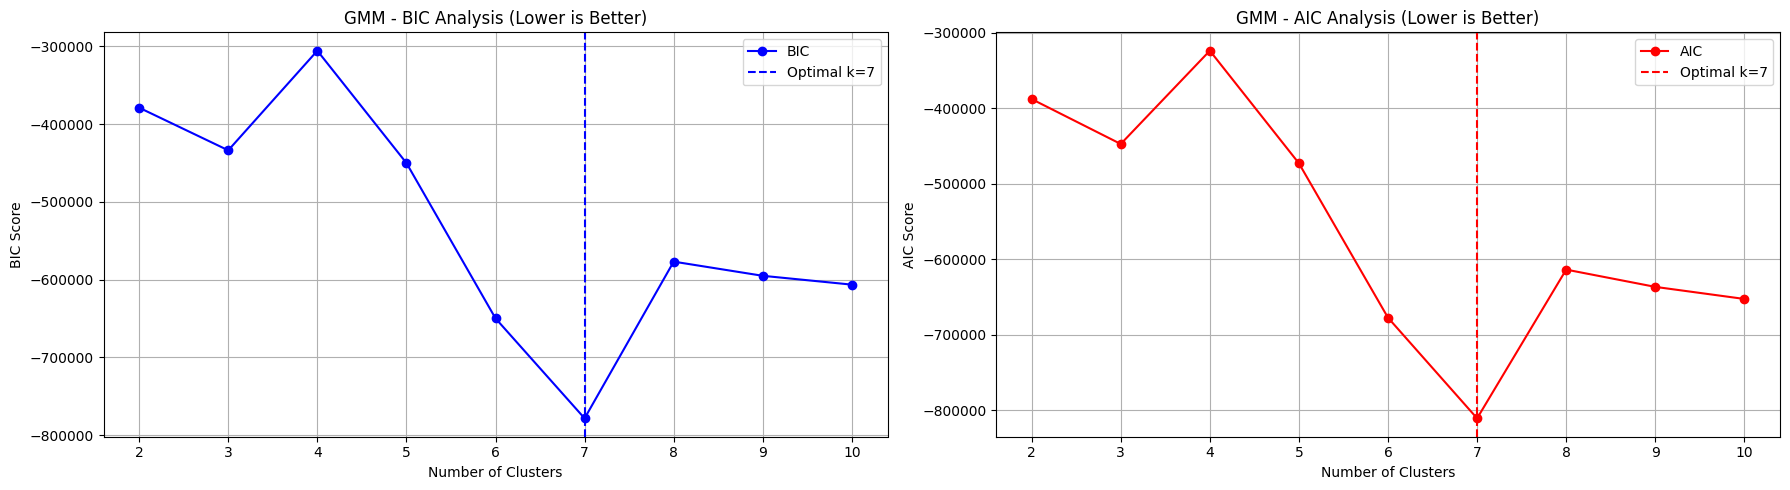


===== GMM Optimal Cluster Summary =====
Optimal clusters (BIC): 7
Optimal clusters (AIC): 7


In [37]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

gmm_bic = []
gmm_aic = []

print("Evaluating GMM for different cluster values...\n")

for k in cluster_range:
    try:
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(X_main)
        
        # Compute BIC and AIC
        bic_val = gmm.bic(X_main)
        aic_val = gmm.aic(X_main)
        gmm_bic.append(bic_val)
        gmm_aic.append(aic_val)
        print(f"k={k} | BIC={bic_val:.2f}, AIC={aic_val:.2f}")
    
    except Exception as e:
        print(f"Error for k={k}: {e}")
        gmm_bic.append(np.nan)
        gmm_aic.append(np.nan)

# Convert to NumPy arrays for easy indexing
gmm_bic = np.array(gmm_bic)
gmm_aic = np.array(gmm_aic)


# Identify optimal values
optimal_k_bic = cluster_range[np.nanargmin(gmm_bic)]
optimal_k_aic = cluster_range[np.nanargmin(gmm_aic)]

# ===============================================
# Plotting
# ===============================================
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

# Plot BIC
ax[0].plot(cluster_range, gmm_bic, 'bo-', label='BIC')
ax[0].axvline(optimal_k_bic, color='b', linestyle='--', label=f'Optimal k={optimal_k_bic}')
ax[0].set_title('GMM - BIC Analysis (Lower is Better)')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('BIC Score')
ax[0].legend()
ax[0].grid(True)

# Plot AIC
ax[1].plot(cluster_range, gmm_aic, 'ro-', label='AIC')
ax[1].axvline(optimal_k_aic, color='r', linestyle='--', label=f'Optimal k={optimal_k_aic}')
ax[1].set_title('GMM - AIC Analysis (Lower is Better)')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('AIC Score')
ax[1].legend()
ax[1].grid(True)


plt.tight_layout()
plt.show()

print("\n===== GMM Optimal Cluster Summary =====")
print(f"Optimal clusters (BIC): {optimal_k_bic}")
print(f"Optimal clusters (AIC): {optimal_k_aic}")



### Agglomerative Clustering - Dendrogram

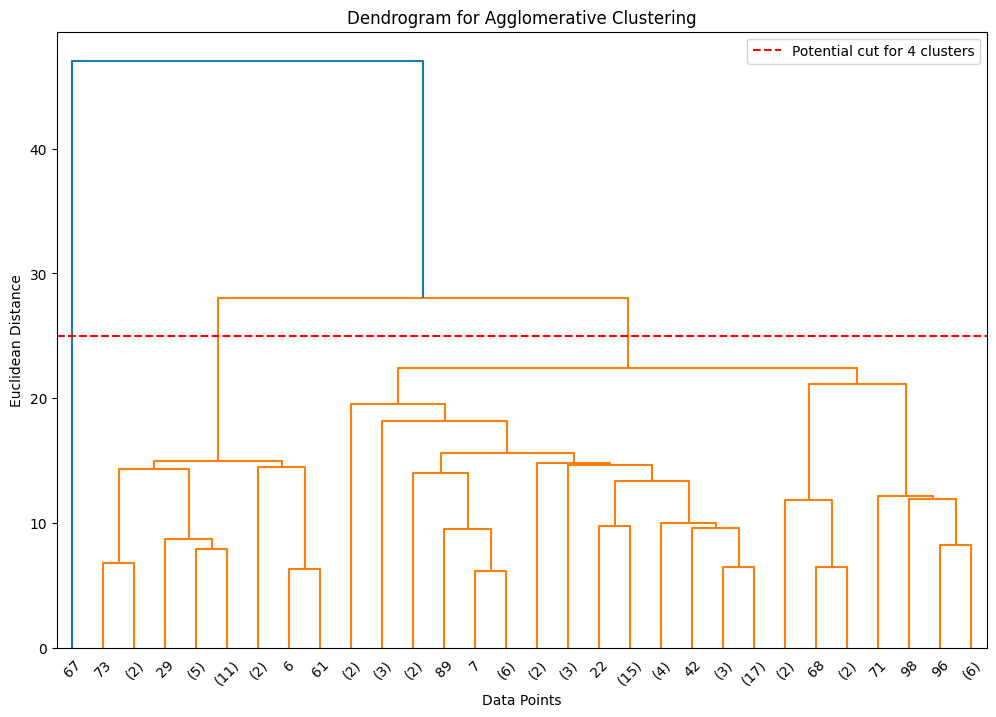

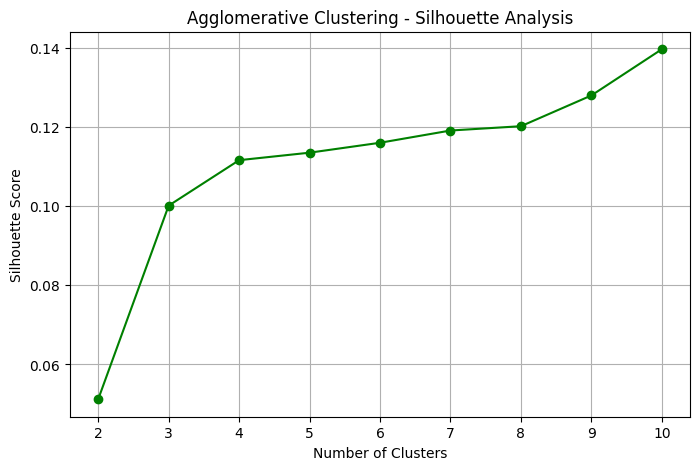

Optimal number of clusters for Agglomerative: 10
Best Agglomerative Silhouette Score: 0.1397


In [38]:
# Agglomerative Clustering - Dendrogram (using sample for efficiency)
plt.figure(figsize=(12, 8))
# Use smaller sample for dendrogram to avoid memory issues
sample_size = min(100, len(X_main))
dendrogram = sch.dendrogram(sch.linkage(X_main[:sample_size], method='ward'), 
                           truncate_mode='lastp',
                           p=30)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.axhline(y=25, color='r', linestyle='--', label='Potential cut for 4 clusters')
plt.legend()
plt.show()

# Silhouette analysis for Agglomerative Clustering
agglo_silhouette = []

for k in cluster_range:
    agglo = AgglomerativeClustering(n_clusters=k)
    labels = agglo.fit_predict(X_main)
    silhouette_avg = silhouette_score(X_main, labels)
    agglo_silhouette.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, agglo_silhouette, 'go-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Agglomerative Clustering - Silhouette Analysis')
plt.grid(True)
plt.show()

optimal_k_agglo = cluster_range[np.argmax(agglo_silhouette)]
print(f"Optimal number of clusters for Agglomerative: {optimal_k_agglo}")
print(f"Best Agglomerative Silhouette Score: {max(agglo_silhouette):.4f}")

### 2. Implementing All Three Clustering Algorithms

In [39]:
# Set optimal clusters for each algorithm based on your results
optimal_clusters = {
    'KMeans': optimal_k_silhouette,   
    'GMM': optimal_k_gmm_bic, 
    'Agglomerative':optimal_k_agglo 
}

print("OPTIMAL CLUSTERS FOR EACH ALGORITHM:")
print("="*40)
for algo, k in optimal_clusters.items():
    print(f"{algo}: {k} clusters")

# Implement each algorithm with their optimal cluster count
print("\nImplementing algorithms with their optimal cluster numbers...")

# KMeans with 2 clusters 
kmeans_optimal = KMeans(n_clusters=optimal_clusters['KMeans'], random_state=42, n_init=20)
kmeans_labels = kmeans_optimal.fit_predict(X_main)
kmeans_metrics = evaluate_clustering(X_main, kmeans_labels)

# GMM with 5 clusters (using silhouette-optimized)
gmm_optimal = GaussianMixture(n_components=optimal_clusters['GMM'], random_state=42)
gmm_labels = gmm_optimal.fit_predict(X_main)
gmm_metrics = evaluate_clustering(X_main, gmm_labels)

# Agglomerative with 6 clusters
agglo_optimal = AgglomerativeClustering(n_clusters=optimal_clusters['Agglomerative'])
agglo_labels = agglo_optimal.fit_predict(X_main)
agglo_metrics = evaluate_clustering(X_main, agglo_labels)

print("All algorithms implemented successfully with their optimal cluster counts!")

NameError: name 'optimal_k_gmm_bic' is not defined

### Enhanced Visualization with Different Cluster Counts

Applying t-SNE for visualization...


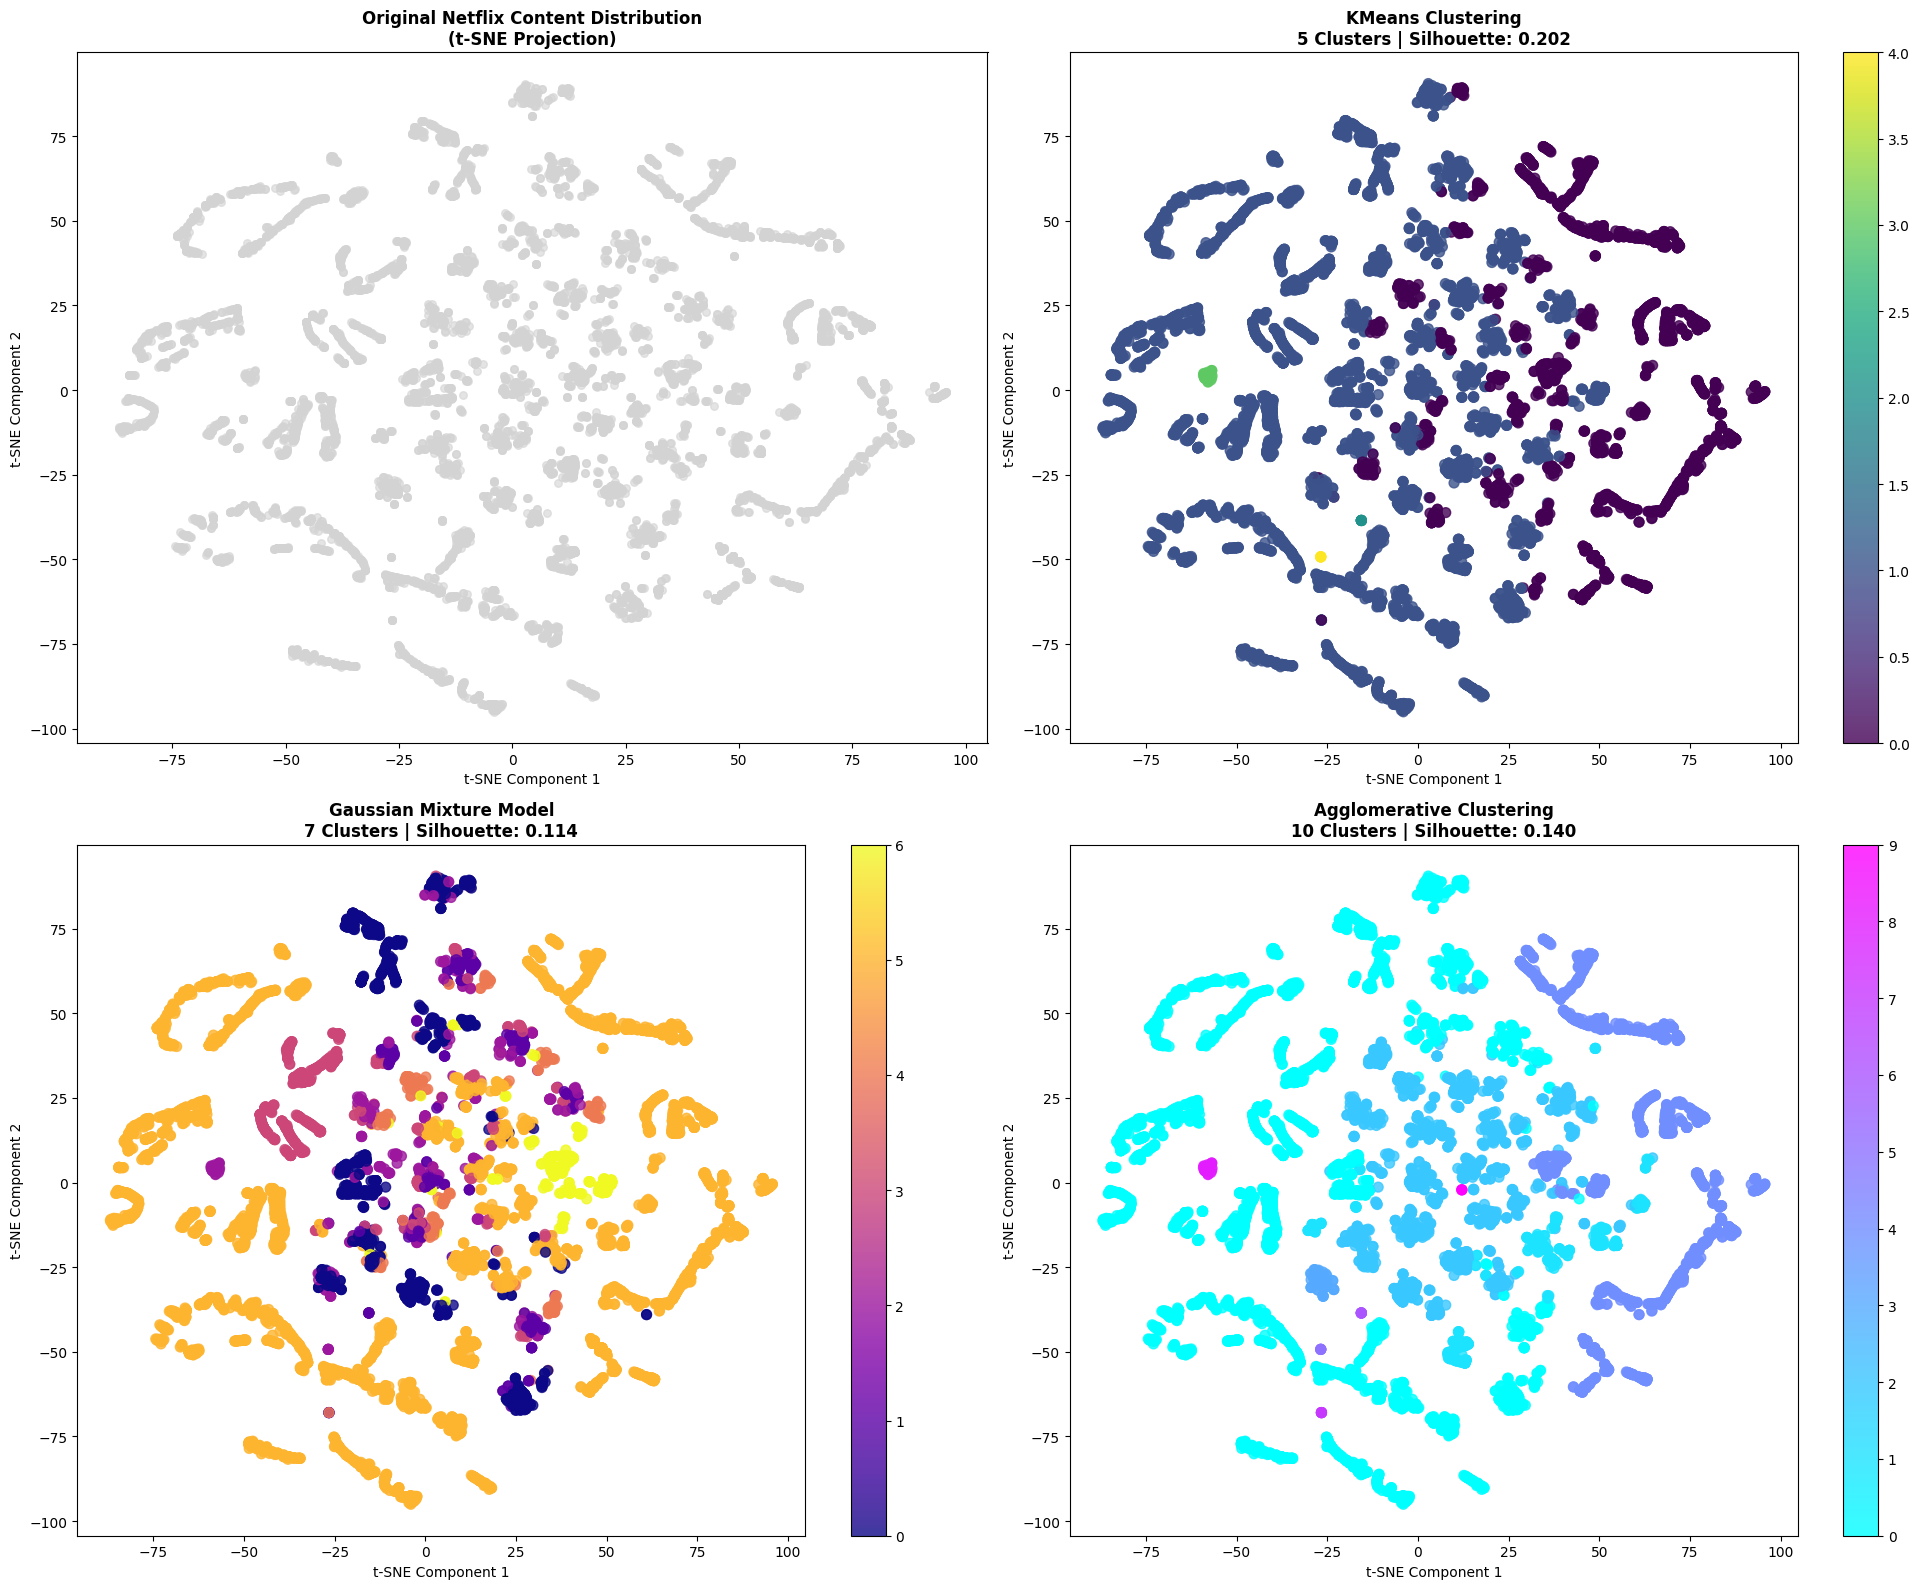

In [ ]:
# Apply t-SNE for consistent visualization across all algorithms (FIXED parameter)
print("Applying t-SNE for visualization...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)  # Fixed: n_iter -> max_iter
X_tsne = tsne.fit_transform(X_main)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot 1: Original data
axes[0,0].scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6, c='lightgray', s=30)
axes[0,0].set_title('Original Netflix Content Distribution\n(t-SNE Projection)', fontweight='bold')
axes[0,0].set_xlabel('t-SNE Component 1')
axes[0,0].set_ylabel('t-SNE Component 2')

# Plot 2: KMeans with 2 clusters
scatter1 = axes[0,1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.8, s=50)
axes[0,1].set_title(f'KMeans Clustering\n{optimal_clusters["KMeans"]} Clusters | Silhouette: {kmeans_metrics["silhouette"]:.3f}', 
                    fontweight='bold')
axes[0,1].set_xlabel('t-SNE Component 1')
axes[0,1].set_ylabel('t-SNE Component 2')
plt.colorbar(scatter1, ax=axes[0,1])

# Plot 3: GMM with 5 clusters
scatter2 = axes[1,0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=gmm_labels, cmap='plasma', alpha=0.8, s=50)
axes[1,0].set_title(f'Gaussian Mixture Model\n{optimal_clusters["GMM"]} Clusters | Silhouette: {gmm_metrics["silhouette"]:.3f}', 
                    fontweight='bold')
axes[1,0].set_xlabel('t-SNE Component 1')
axes[1,0].set_ylabel('t-SNE Component 2')
plt.colorbar(scatter2, ax=axes[1,0])

# Plot 4: Agglomerative with 6 clusters
scatter3 = axes[1,1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=agglo_labels, cmap='cool', alpha=0.8, s=50)
axes[1,1].set_title(f'Agglomerative Clustering\n{optimal_clusters["Agglomerative"]} Clusters | Silhouette: {agglo_metrics["silhouette"]:.3f}', 
                    fontweight='bold')
axes[1,1].set_xlabel('t-SNE Component 1')
axes[1,1].set_ylabel('t-SNE Component 2')
plt.colorbar(scatter3, ax=axes[1,1])

plt.tight_layout()
plt.show()

### 3. Comprehensive Model Evaluation with Optimal Clusters

CLUSTERING ALGORITHMS COMPARISON WITH OPTIMAL CLUSTERS
                   KMeans (k=5)  GMM (k=7)  Agglomerative (k=10)
silhouette               0.2021     0.1137                0.1397
calinski_harabasz      472.0361   176.3853              302.1055
davies_bouldin           1.0142     3.7890                1.8394


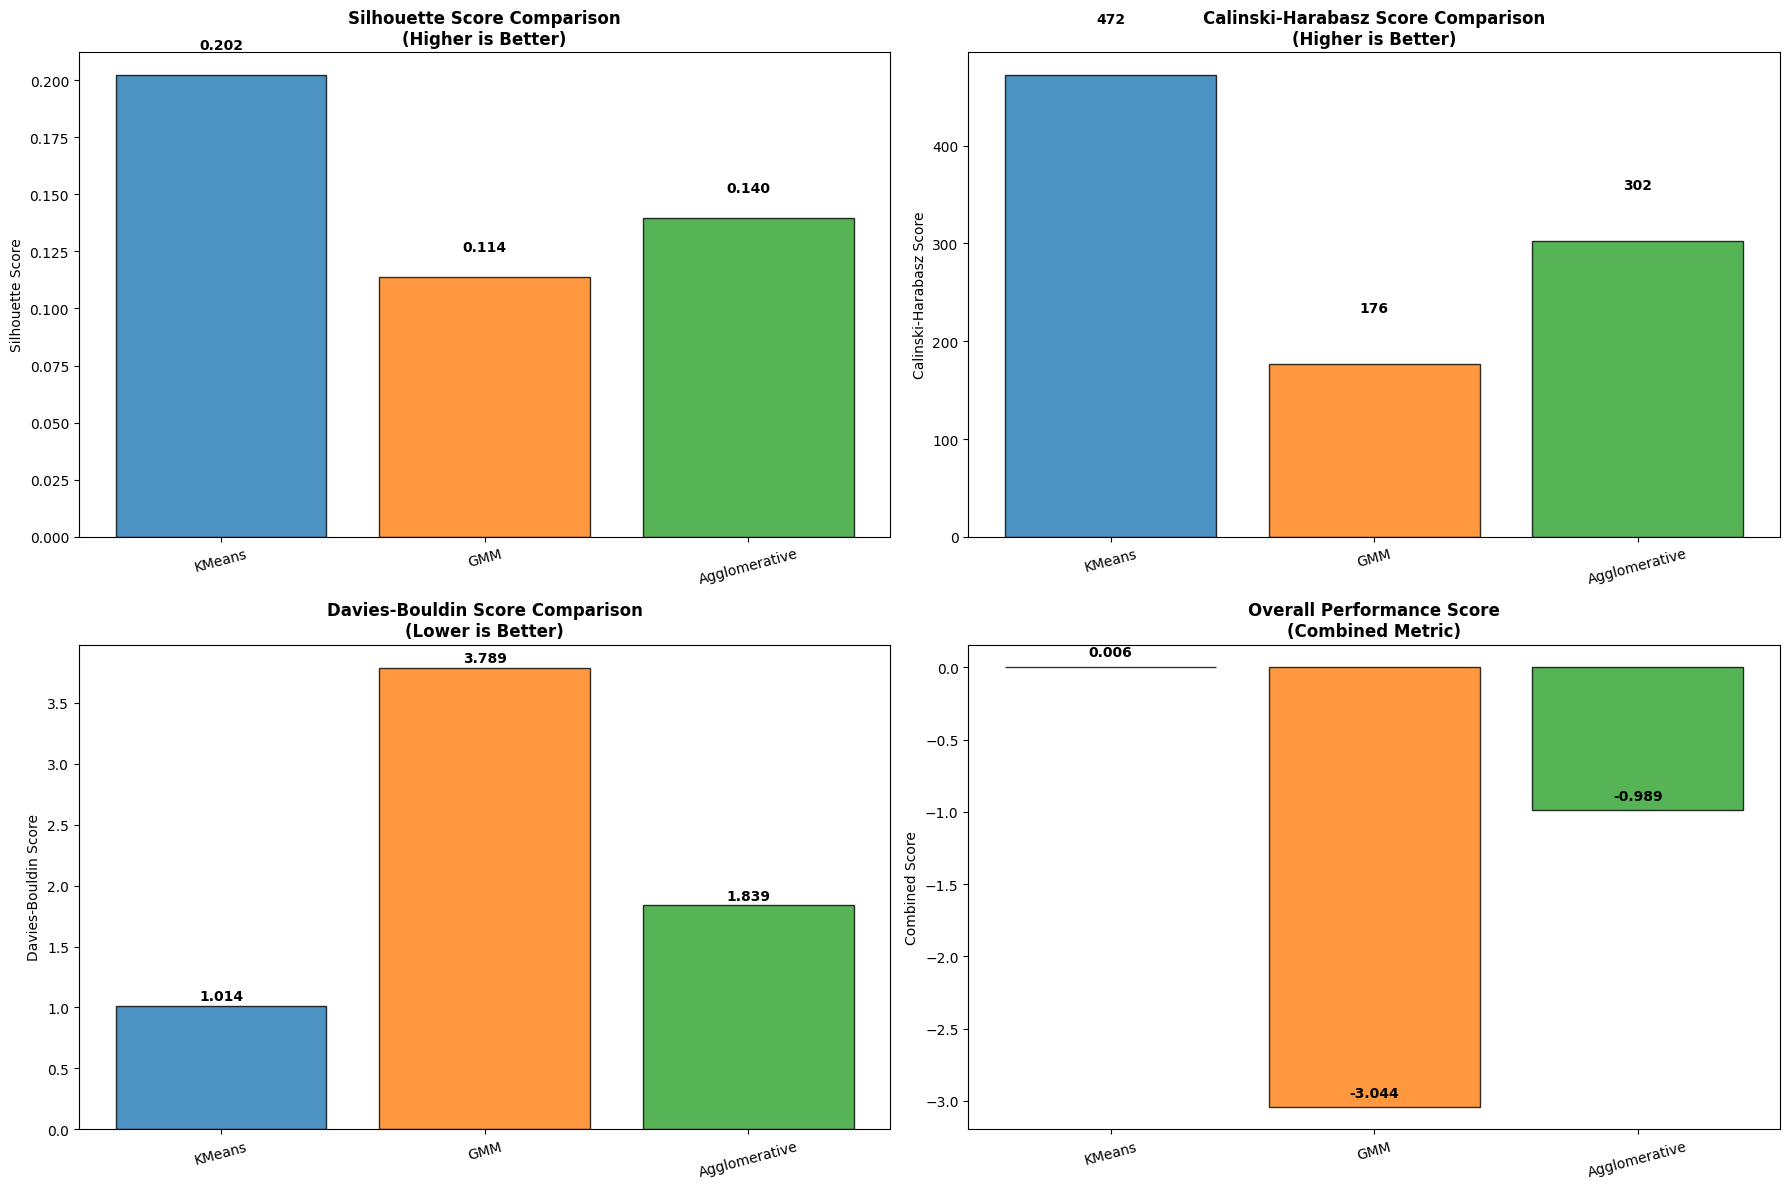


PERFORMANCE SUMMARY:
🏆 Best Performing Model: KMeans (Silhouette: 0.2021)


In [ ]:
# Create evaluation metrics comparison with optimal clusters
metrics_comparison = pd.DataFrame({
    'KMeans (k=5)': kmeans_metrics,
    'GMM (k=7)': gmm_metrics,
    'Agglomerative (k=10)': agglo_metrics
})

print("CLUSTERING ALGORITHMS COMPARISON WITH OPTIMAL CLUSTERS")
print("="*60)
print(metrics_comparison.round(4))

# Enhanced visualization with optimal clusters
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

model_names = ['KMeans', 'GMM', 'Agglomerative']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Silhouette Score Comparison
silhouette_scores = [kmeans_metrics['silhouette'], gmm_metrics['silhouette'], agglo_metrics['silhouette']]
bars1 = axes[0,0].bar(model_names, silhouette_scores, color=colors, alpha=0.8, edgecolor='black')
axes[0,0].set_title('Silhouette Score Comparison\n(Higher is Better)', fontweight='bold', fontsize=12)
axes[0,0].set_ylabel('Silhouette Score')
axes[0,0].tick_params(axis='x', rotation=15)
for bar, score in zip(bars1, silhouette_scores):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                  f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Calinski-Harabasz Score Comparison
calinski_scores = [kmeans_metrics['calinski_harabasz'], gmm_metrics['calinski_harabasz'], agglo_metrics['calinski_harabasz']]
bars2 = axes[0,1].bar(model_names, calinski_scores, color=colors, alpha=0.8, edgecolor='black')
axes[0,1].set_title('Calinski-Harabasz Score Comparison\n(Higher is Better)', fontweight='bold', fontsize=12)
axes[0,1].set_ylabel('Calinski-Harabasz Score')
axes[0,1].tick_params(axis='x', rotation=15)
for bar, score in zip(bars2, calinski_scores):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                  f'{score:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Davies-Bouldin Score Comparison
davies_scores = [kmeans_metrics['davies_bouldin'], gmm_metrics['davies_bouldin'], agglo_metrics['davies_bouldin']]
bars3 = axes[1,0].bar(model_names, davies_scores, color=colors, alpha=0.8, edgecolor='black')
axes[1,0].set_title('Davies-Bouldin Score Comparison\n(Lower is Better)', fontweight='bold', fontsize=12)
axes[1,0].set_ylabel('Davies-Bouldin Score')
axes[1,0].tick_params(axis='x', rotation=15)
for bar, score in zip(bars3, davies_scores):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                  f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Overall Performance Score (Custom Combined Metric)
overall_scores = [
    (kmeans_metrics['silhouette'] * 2 + np.log(kmeans_metrics['calinski_harabasz']) / 10 - kmeans_metrics['davies_bouldin']),
    (gmm_metrics['silhouette'] * 2 + np.log(gmm_metrics['calinski_harabasz']) / 10 - gmm_metrics['davies_bouldin']),
    (agglo_metrics['silhouette'] * 2 + np.log(agglo_metrics['calinski_harabasz']) / 10 - agglo_metrics['davies_bouldin'])
]
bars4 = axes[1,1].bar(model_names, overall_scores, color=colors, alpha=0.8, edgecolor='black')
axes[1,1].set_title('Overall Performance Score\n(Combined Metric)', fontweight='bold', fontsize=12)
axes[1,1].set_ylabel('Combined Score')
axes[1,1].tick_params(axis='x', rotation=15)
for bar, score in zip(bars4, overall_scores):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                  f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Performance summary
print("\nPERFORMANCE SUMMARY:")
print("="*40)
best_model = max([
    ('KMeans', kmeans_metrics['silhouette']),
    ('GMM', gmm_metrics['silhouette']),
    ('Agglomerative', agglo_metrics['silhouette'])
], key=lambda x: x[1])

print(f"🏆 Best Performing Model: {best_model[0]} (Silhouette: {best_model[1]:.4f})")

## Insight Extraction

### Cluster Interpretation And Profiling    

In [ ]:
# Fix the cluster analysis function
def analyze_clusters(df_preprocessed, cluster_labels, algorithm_name):
    """
    Analyze cluster characteristics using the preprocessed dataframe
    """
    df_analysis = df_preprocessed.copy()
    df_analysis['cluster'] = cluster_labels
    
    cluster_profiles = {}
    for cluster in np.unique(cluster_labels):
        cluster_data = df_analysis[df_analysis['cluster'] == cluster]
        
        profile = {
            'size': len(cluster_data),
            'percentage': len(cluster_data) / len(df_analysis) * 100,
            'avg_duration': cluster_data['duration_minutes'].mean() if 'duration_minutes' in cluster_data.columns else None,
            'avg_release_year': cluster_data['release_year'].mean() if 'release_year' in cluster_data.columns else None,
            'type_distribution': cluster_data['type_Movie'].value_counts() if 'type_Movie' in cluster_data.columns else None,
            'common_ratings': "N/A",  # We'll handle this separately
        }
        cluster_profiles[cluster] = profile
    
    return cluster_profiles

# Apply to your best model (KMeans) - use the preprocessed dataframe
kmeans_profiles = analyze_clusters(df_preprocessed, kmeans_labels, 'KMeans')

print("KMEANS CLUSTER PROFILES:")
print("="*50)
for cluster, profile in kmeans_profiles.items():
    print(f"\nCluster {cluster}:")
    print(f"  Size: {profile['size']} ({profile['percentage']:.1f}%)")
    print(f"  Avg Duration: {profile['avg_duration']:.1f} minutes")
    print(f"  Avg Release Year: {profile['avg_release_year']:.1f}")

KMEANS CLUSTER PROFILES:

Cluster 0:
  Size: 2398 (30.8%)
  Avg Duration: 0.0 minutes
  Avg Release Year: 2016.6

Cluster 1:
  Size: 5328 (68.5%)
  Avg Duration: 99.4 minutes
  Avg Release Year: 2014.6

Cluster 2:
  Size: 7 (0.1%)
  Avg Duration: 53.7 minutes
  Avg Release Year: 2014.6

Cluster 3:
  Size: 39 (0.5%)
  Avg Duration: 88.1 minutes
  Avg Release Year: 2008.9

Cluster 4:
  Size: 5 (0.1%)
  Avg Duration: 106.8 minutes
  Avg Release Year: 2008.7


### Map Back to Original Data

In [ ]:
# Create a mapping from preprocessed indices to original data
def map_clusters_to_original(df_original, df_preprocessed, cluster_labels):
    """
    Map cluster labels back to the original dataframe
    """
    # Get the indices that survived preprocessing
    preprocessed_indices = df_preprocessed.index
    
    # Create a series with cluster labels for the original indices
    cluster_series = pd.Series(index=preprocessed_indices, data=cluster_labels)
    
    # Map to original dataframe
    df_original_mapped = df_original.loc[preprocessed_indices].copy()
    df_original_mapped['cluster'] = cluster_series.values
    
    return df_original_mapped

# Map KMeans clusters to original data
df_with_clusters = map_clusters_to_original(df, df_preprocessed, kmeans_labels)

print(f"Original data shape: {df.shape}")
print(f"Data with clusters shape: {df_with_clusters.shape}")
print(f"Missing clusters: {len(df) - len(df_with_clusters)} rows removed during preprocessing")

Original data shape: (7787, 12)
Data with clusters shape: (7777, 13)
Missing clusters: 10 rows removed during preprocessing


### Comprehensive Cluster Analysis

In [ ]:
def comprehensive_cluster_analysis(df_with_clusters, cluster_col='cluster'):
    """
    Perform comprehensive analysis of clusters
    """
    results = {}
    
    # Basic cluster statistics
    cluster_sizes = df_with_clusters[cluster_col].value_counts().sort_index()
    results['cluster_sizes'] = cluster_sizes
    
    # Content type analysis
    type_analysis = pd.crosstab(df_with_clusters[cluster_col], df_with_clusters['type'])
    results['type_distribution'] = type_analysis
    
    # Rating analysis
    rating_analysis = pd.crosstab(df_with_clusters[cluster_col], df_with_clusters['rating'])
    results['rating_distribution'] = rating_analysis
    
    # Numerical features analysis
    numerical_features = ['release_year', 'duration_minutes'] if 'duration_minutes' in df_with_clusters.columns else ['release_year']
    
    numerical_stats = df_with_clusters.groupby(cluster_col)[numerical_features].agg(['mean', 'std', 'min', 'max'])
    results['numerical_stats'] = numerical_stats
    
    # Country analysis (top countries per cluster)
    country_analysis = {}
    for cluster in df_with_clusters[cluster_col].unique():
        cluster_countries = df_with_clusters[df_with_clusters[cluster_col] == cluster]['country']
        top_countries = cluster_countries.value_counts().head(5)
        country_analysis[cluster] = top_countries
    results['country_distribution'] = country_analysis
    
    # Genre analysis (top genres per cluster)
    genre_analysis = {}
    for cluster in df_with_clusters[cluster_col].unique():
        cluster_genres = df_with_clusters[df_with_clusters[cluster_col] == cluster]['listed_in']
        # Split genres and count
        all_genres = cluster_genres.str.split(', ').explode()
        top_genres = all_genres.value_counts().head(5)
        genre_analysis[cluster] = top_genres
    results['genre_distribution'] = genre_analysis
    
    return results

# Perform comprehensive analysis
cluster_analysis = comprehensive_cluster_analysis(df_with_clusters)

print("COMPREHENSIVE CLUSTER ANALYSIS")
print("="*60)

# Display cluster sizes
print("\nCLUSTER SIZES:")
print(cluster_analysis['cluster_sizes'])

# Display type distribution
print("\nCONTENT TYPE DISTRIBUTION:")
print(cluster_analysis['type_distribution'])

# Display numerical statistics
print("\nNUMERICAL FEATURES BY CLUSTER:")
print(cluster_analysis['numerical_stats'].round(2))

COMPREHENSIVE CLUSTER ANALYSIS

CLUSTER SIZES:
cluster
0    2398
1    5328
2       7
3      39
4       5
Name: count, dtype: int64

CONTENT TYPE DISTRIBUTION:
type     Movie  TV Show
cluster                
0            0     2398
1         5328        0
2            5        2
3           39        0
4            5        0

NUMERICAL FEATURES BY CLUSTER:
        release_year                   
                mean    std   min   max
cluster                                
0            2016.21   5.66  1925  2021
1            2013.03   9.49  1942  2021
2            2014.57   2.44  2010  2017
3            1998.41  18.04  1956  2020
4            2002.40  16.32  1974  2016


### Visualize Cluster Characteristics

In [ ]:
# Create visualization of cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Cluster sizes
cluster_sizes = cluster_analysis['cluster_sizes']
axes[0,0].bar(cluster_sizes.index, cluster_sizes.values, color='skyblue', edgecolor='black')
axes[0,0].set_title('Cluster Sizes Distribution', fontweight='bold')
axes[0,0].set_xlabel('Cluster')
axes[0,0].set_ylabel('Number of Contents')
for i, v in enumerate(cluster_sizes.values):
    axes[0,0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Content type distribution
type_dist = cluster_analysis['type_distribution']
type_dist.plot(kind='bar', ax=axes[0,1], color=['lightcoral', 'lightgreen'])
axes[0,1].set_title('Content Type Distribution by Cluster', fontweight='bold')
axes[0,1].set_xlabel('Cluster')
axes[0,1].set_ylabel('Count')
axes[0,1].legend(title='Content Type')
axes[0,1].tick_params(axis='x', rotation=0)

# 3. Average duration by cluster
if 'duration_minutes' in df_with_clusters.columns:
    duration_means = cluster_analysis['numerical_stats'][('duration_minutes', 'mean')]
    axes[1,0].bar(duration_means.index, duration_means.values, color='gold', edgecolor='black')
    axes[1,0].set_title('Average Duration by Cluster', fontweight='bold')
    axes[1,0].set_xlabel('Cluster')
    axes[1,0].set_ylabel('Duration (minutes)')
    for i, v in enumerate(duration_means.values):
        axes[1,0].text(i, v + 2, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Release year distribution
release_means = cluster_analysis['numerical_stats'][('release_year', 'mean')]
axes[1,1].bar(release_means.index, release_means.values, color='lightpink', edgecolor='black')
axes[1,1].set_title('Average Release Year by Cluster', fontweight='bold')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Release Year')
for i, v in enumerate(release_means.values):
    axes[1,1].text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Detailed Genre Analysis by Cluster

In [ ]:
print("TOP GENRES BY CLUSTER:")
print("="*50)
for cluster, genres in cluster_analysis['genre_distribution'].items():
    print(f"\nCluster {cluster} (n={cluster_analysis['cluster_sizes'][cluster]}):")
    for genre, count in genres.items():
        percentage = (count / cluster_analysis['cluster_sizes'][cluster]) * 100
        print(f"  {genre}: {count} ({percentage:.1f}%)")

TOP GENRES BY CLUSTER:

Cluster 0 (n=2398):
  International TV Shows: 1197 (49.9%)
  TV Dramas: 703 (29.3%)
  TV Comedies: 517 (21.6%)
  Crime TV Shows: 426 (17.8%)
  Kids' TV: 411 (17.1%)

Cluster 1 (n=5328):
  International Movies: 2433 (45.7%)
  Dramas: 2097 (39.4%)
  Comedies: 1458 (27.4%)
  Documentaries: 781 (14.7%)
  Action & Adventure: 718 (13.5%)

Cluster 2 (n=7):
  Movies: 4 (57.1%)
  Anime Series: 1 (14.3%)
  International TV Shows: 1 (14.3%)
  Kids' TV: 1 (14.3%)
  TV Comedies: 1 (14.3%)

Cluster 3 (n=39):
  Children & Family Movies: 31 (79.5%)
  Comedies: 11 (28.2%)
  Classic Movies: 7 (17.9%)
  Dramas: 5 (12.8%)
  Music & Musicals: 5 (12.8%)

Cluster 4 (n=5):
  Romantic Movies: 3 (60.0%)
  International Movies: 3 (60.0%)
  Dramas: 3 (60.0%)
  Comedies: 2 (40.0%)
  Action & Adventure: 2 (40.0%)


### Business Insights Summary

In [ ]:
def generate_business_insights(cluster_analysis):
    """
    Generate actionable business insights from cluster analysis
    """
    insights = []
    
    # Find the largest cluster
    largest_cluster = cluster_analysis['cluster_sizes'].idxmax()
    largest_size = cluster_analysis['cluster_sizes'].max()
    insights.append(f"📊 Largest cluster is {largest_cluster} with {largest_size} contents ({largest_size/len(df_with_clusters)*100:.1f}% of catalog)")
    
    # Find cluster with most movies vs TV shows
    type_ratio = cluster_analysis['type_distribution'].copy()
    type_ratio['movie_ratio'] = type_ratio['Movie'] / (type_ratio['Movie'] + type_ratio['TV Show'])
    movie_heavy_cluster = type_ratio['movie_ratio'].idxmax()
    tv_heavy_cluster = type_ratio['movie_ratio'].idxmin()
    
    insights.append(f"🎬 Most movie-heavy cluster: {movie_heavy_cluster} ({type_ratio.loc[movie_heavy_cluster, 'movie_ratio']*100:.1f}% movies)")
    insights.append(f"📺 Most TV show-heavy cluster: {tv_heavy_cluster} ({type_ratio.loc[tv_heavy_cluster, 'movie_ratio']*100:.1f}% movies)")
    
    # Recent vs older content
    if 'release_year' in cluster_analysis['numerical_stats']:
        recent_cluster = cluster_analysis['numerical_stats'][('release_year', 'mean')].idxmax()
        oldest_cluster = cluster_analysis['numerical_stats'][('release_year', 'mean')].idxmin()
        insights.append(f"🆕 Most recent content cluster: {recent_cluster} (avg year: {cluster_analysis['numerical_stats'][('release_year', 'mean')][recent_cluster]:.1f})")
        insights.append(f"🕰️  Oldest content cluster: {oldest_cluster} (avg year: {cluster_analysis['numerical_stats'][('release_year', 'mean')][oldest_cluster]:.1f})")
    
    return insights

# Generate insights
business_insights = generate_business_insights(cluster_analysis)

print("\n🚀 ACTIONABLE BUSINESS INSIGHTS:")
print("="*50)
for insight in business_insights:
    print(f"• {insight}")


🚀 ACTIONABLE BUSINESS INSIGHTS:
• 📊 Largest cluster is 1 with 5328 contents (68.5% of catalog)
• 🎬 Most movie-heavy cluster: 1 (100.0% movies)
• 📺 Most TV show-heavy cluster: 0 (0.0% movies)
• 🆕 Most recent content cluster: 0 (avg year: 2016.2)
• 🕰️  Oldest content cluster: 3 (avg year: 1998.4)
